### **Importing libraries**

In [1]:
# !pip install umap-learn[plot]
# !pip install holoviews
# !pip install -U ipykernel
# #
# !pip uninstall scipy -y
# !pip uninstall pingouin -y
# !pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 670.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 2.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import umap
from sklearn.decomposition import PCA
import pingouin as pg

### **Reading data file**

In [3]:
# #Reading the training data Subject
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### **Loading Dataset**

In [4]:


def load_files():
    full_data = pd.DataFrame()

    for i in range(1, 41):
        # Load the .mat file
        mat = loadmat(f'/content/drive/My Drive/Colab Notebooks/dataset/S{i}_E1.mat')

        # Read both angles (36-57) and EMG channels (58-81)
        angles = pd.DataFrame(mat['Data'])[[x for x in range(36, 58)]]
        emg_channels = pd.DataFrame(mat['Data'])[[x for x in range(58, 82)]]

        # Combine angles and EMG channels into one DataFrame
        data = pd.concat([angles, emg_channels], axis=1)

        # Add subject number column
        data['subject_num'] = [i] * len(data)

        # Append to full data
        full_data = pd.concat([full_data, data])

    return full_data


In [5]:
full_data = load_files()
full_data

,36,37,38,39,40,41,42,43,44,45,...,73,74,75,76,77,78,79,80,81,subject_num
0,0.520738,0.292453,0.402597,0.369162,0.640667,0.375723,0.248848,0.508621,0.404450,0.333333,...,0.001144,0.019959,0.004244,0.001541,0.005347,0.002003,0.002017,0.029042,0.175866,1
1,0.520738,0.292453,0.402597,0.369162,0.640667,0.375723,0.248848,0.508621,0.404450,0.333333,...,0.002365,0.005928,0.008933,0.002392,0.007508,0.003380,0.002036,0.020224,0.118686,1
2,0.520738,0.292453,0.402597,0.369162,0.640667,0.375723,0.248848,0.508621,0.404450,0.333333,...,0.001120,0.007142,0.008630,0.000762,0.002924,0.002671,0.000730,0.025460,0.117067,1
3,0.520738,0.292453,0.402597,0.369162,0.640667,0.375723,0.248848,0.508621,0.404450,0.333333,...,0.001687,0.009596,0.004619,0.001762,0.006580,0.004306,0.001875,0.013656,0.132933,1
4,0.520738,0.292453,0.402597,0.369162,0.640667,0.375723,0.248848,0.508621,0.404450,0.333333,...,0.002022,0.014417,0.007650,0.000980,0.004557,0.001877,0.002354,0.026736,0.158915,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,0.597649,0.416499,0.401907,0.500915,0.680761,0.370601,0.390900,0.677729,0.377911,0.215885,...,0.001716,0.009669,0.061147,0.146444,0.018020,0.029346,0.172417,0.005285,0.021608,40
8857,0.612974,0.436966,0.397694,0.472716,0.731925,0.504792,0.526828,0.759365,0.505555,0.198169,...,0.002769,0.013926,0.039377,0.074346,0.013383,0.026964,0.113099,0.005636,0.028089,40
8858,0.616767,0.447141,0.404828,0.445110,0.745183,0.565538,0.576896,0.776285,0.564755,0.183063,...,0.000934,0.007441,0.031599,0.056418,0.009058,0.008047,0.062303,0.007755,0.033634,40
8859,0.616767,0.445660,0.404837,0.445097,0.737729,0.557240,0.566628,0.770896,0.554980,0.185185,...,0.001314,0.008435,0.022100,0.057066,0.009051,0.004950,0.078184,0.003933,0.018070,40


### **Checking correlation between data and emg**

In [6]:
from scipy.stats import pearsonr

def calculate_correlation_per_subject(full_data):
    correlation_dict = {}

    # Loop over each subject
    for subject_id in full_data['subject_num'].unique():
        subject_data = full_data[full_data['subject_num'] == subject_id]

        # Extract angles (columns 0-21) and EMG (columns 22-45)
        angles = subject_data.iloc[:, 0:22]  # Angles are in columns 36-57 in original, so 0-21 after concatenation
        emg_channels = subject_data.iloc[:, 22:46]  # EMG channels in columns 58-81 in original, so 22-45 after concatenation

        # Initialize a correlation matrix to hold the correlation between each angle and EMG channel
        correlation_matrix = pd.DataFrame(index=[f'EMG_{i+1}' for i in range(emg_channels.shape[1])],
                                          columns=[f'Angle_{i+1}' for i in range(angles.shape[1])])

        # Calculate Pearson correlation for each pair of EMG and Angle
        for emg_idx in range(emg_channels.shape[1]):
            for angle_idx in range(angles.shape[1]):
                corr, _ = pearsonr(emg_channels.iloc[:, emg_idx], angles.iloc[:, angle_idx])
                correlation_matrix.iloc[emg_idx, angle_idx] = corr

        # Store the correlation matrix for the current subject
        correlation_dict[subject_id] = correlation_matrix

    return correlation_dict

# Load the data
full_data = load_files()

# Calculate correlations for each subject
correlation_per_subject = calculate_correlation_per_subject(full_data)

# Display correlation matrix for a specific subject (e.g., Subject 1)
print(f"Correlation matrix for Subject 1:\n {correlation_per_subject[1]}")


Correlation matrix for Subject 1:
          Angle_1   Angle_2   Angle_3   Angle_4   Angle_5   Angle_6   Angle_7  \
EMG_1  -0.230882  0.004165 -0.154568  0.143511 -0.286292 -0.173177 -0.028056   
EMG_2  -0.057853  0.140907  0.008313 -0.011635 -0.102072 -0.021366 -0.020855   
EMG_3  -0.385671 -0.034505 -0.294207  0.308716 -0.499617  -0.51898 -0.069874   
EMG_4  -0.321231  0.128588 -0.240643  0.330486 -0.262864 -0.372162 -0.133186   
EMG_5  -0.373292    0.0907 -0.286453  0.339731 -0.354767 -0.407332 -0.155314   
EMG_6  -0.139027  0.156224 -0.017355  0.089546 -0.212868 -0.124853 -0.124507   
EMG_7  -0.081687  0.134433  0.016151  0.029462 -0.154323 -0.016358 -0.046957   
EMG_8  -0.483254 -0.060263 -0.346576  0.415544 -0.696264 -0.576527 -0.057301   
EMG_9  -0.474717  0.078159 -0.376142  0.439287 -0.507172 -0.550034 -0.153109   
EMG_10 -0.008459  0.164302  0.061382 -0.033982 -0.131353 -0.016075 -0.066953   
EMG_11 -0.233564 -0.060135 -0.217124  0.175094 -0.331868 -0.305089 -0.129091   
EMG_1

### **Finding weak correlation**

In [7]:
# Find DOFs that have no strong correlation to any EMG signals for each subject
def find_no_correlation_dof(correlation_dict, threshold=0.35):
    # Dictionary to hold DOFs with no strong correlation
    no_correlation_dof_per_subject = {}

    # Loop over each subject in the correlation dictionary
    for subject_id, correlation_matrix in correlation_dict.items():
        # Store DOFs with no correlation for this subject
        no_correlation_dofs = []

        # Iterate over each DOF (column in the correlation matrix)
        for dof in correlation_matrix.columns:
            # Get the correlations for this DOF across all EMG channels
            correlations = correlation_matrix[dof].astype(float)

            # Check if all correlations are within the no-correlation threshold
            if all(-threshold < corr < threshold for corr in correlations):
                no_correlation_dofs.append(dof)

        # If any DOFs have no strong correlation, store them
        if no_correlation_dofs:
            no_correlation_dof_per_subject[subject_id] = no_correlation_dofs

    return no_correlation_dof_per_subject

# Main flow
if __name__ == "__main__":
    # Step 1: Load the data
    full_data = load_files()

    # Step 2: Calculate correlations for each subject
    correlation_per_subject = calculate_correlation_per_subject(full_data)

    # Step 3: Find DOFs with no strong correlation to any EMG signals for each subject
    no_correlation_dofs = find_no_correlation_dof(correlation_per_subject, threshold=0.35)

    # Step 4: Display results
    for subject_id, dofs in no_correlation_dofs.items():
        print(f"Subject {subject_id} has no strong correlation for the following DOFs: {dofs}")

Subject 1 has no strong correlation for the following DOFs: ['Angle_2', 'Angle_7', 'Angle_11', 'Angle_15', 'Angle_19', 'Angle_20']
Subject 2 has no strong correlation for the following DOFs: ['Angle_2', 'Angle_3', 'Angle_7', 'Angle_11', 'Angle_12', 'Angle_15', 'Angle_16', 'Angle_19', 'Angle_21']
Subject 3 has no strong correlation for the following DOFs: ['Angle_3', 'Angle_4', 'Angle_7', 'Angle_10', 'Angle_11', 'Angle_15', 'Angle_18', 'Angle_22']
Subject 4 has no strong correlation for the following DOFs: ['Angle_2', 'Angle_3', 'Angle_6', 'Angle_7', 'Angle_9', 'Angle_10', 'Angle_13', 'Angle_14', 'Angle_18', 'Angle_19', 'Angle_20', 'Angle_22']
Subject 5 has no strong correlation for the following DOFs: ['Angle_3']
Subject 6 has no strong correlation for the following DOFs: ['Angle_1', 'Angle_2', 'Angle_3', 'Angle_4', 'Angle_10', 'Angle_12', 'Angle_13', 'Angle_17', 'Angle_19', 'Angle_20']
Subject 7 has no strong correlation for the following DOFs: ['Angle_3', 'Angle_4', 'Angle_11', 'Angl

In [9]:
import matplotlib.pyplot as plt

# Function to create subplots for correlations for each subject
def plot_correlation_subplots(correlation_matrix, subject_id):
    # Number of angles (DOFs)
    num_dofs = correlation_matrix.shape[1]

    # Set up subplots - create a grid with rows and columns
    fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))  # Adjust nrows and ncols based on number of DOFs
    axes = axes.flatten()  # Flatten the axes array to easily iterate over

    # Loop through each DOF and create a bar plot in its corresponding subplot
    for idx, dof in enumerate(correlation_matrix.columns):
        correlation_matrix[dof].astype(float).plot(kind='bar', ax=axes[idx], color='skyblue')
        axes[idx].set_title(f'{dof}')
        axes[idx].set_ylim([-1, 1])  # Set y-axis limit to be consistent across all plots
        axes[idx].axhline(0.35, color='red', linestyle='--')
        axes[idx].axhline(-0.35, color='red', linestyle='--')
        axes[idx].set_xlabel('EMG Channel')
        axes[idx].set_ylabel('Correlation')

    # Adjust layout to prevent overlap
    plt.suptitle(f'Correlation of EMG Channels with Angles for Subject {subject_id}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the title
    plt.show()

# Generate subplots for each subject
for subject_id, correlation_matrix in correlation_per_subject.items():
    plot_correlation_subplots(correlation_matrix, subject_id)


Output hidden; open in https://colab.research.google.com to view.

### **Grouping data by getting mean for every channel**

In [ ]:
full_data.groupby('subject_num').mean()


,58,59,60,61,62,63,64,65,66,67,...,72,73,74,75,76,77,78,79,80,81
subject_num,,,,,,,,,,,,,,,,,,,,,
1,0.069853,0.044392,0.030561,0.030857,0.045438,0.036567,0.054390,0.115483,0.059775,0.044048,...,0.052797,0.030253,0.046503,0.035734,0.051597,0.108651,0.057782,0.044149,0.071020,0.113589
2,0.108859,0.065529,0.062214,0.112486,0.036601,0.082178,0.088970,0.074789,0.063782,0.104575,...,0.056616,0.106876,0.036561,0.083555,0.079846,0.072540,0.059030,0.101454,0.025920,0.201782
3,0.018264,0.042368,0.053822,0.038802,0.021491,0.064316,0.073892,0.078035,0.028776,0.082297,...,0.046114,0.035910,0.022305,0.063970,0.074408,0.079505,0.028190,0.078372,0.088308,0.077992
4,0.088497,0.142749,0.075637,0.046139,0.089011,0.063507,0.081398,0.054508,0.114223,0.078737,...,0.079435,0.057645,0.104144,0.068794,0.079983,0.053416,0.112545,0.076471,0.112894,0.074869
5,0.010284,0.031042,0.041146,0.018478,0.042755,0.041606,0.040212,0.059472,0.022867,0.049131,...,0.038246,0.018094,0.043524,0.044461,0.035816,0.058057,0.023166,0.043915,0.026139,0.161233
6,0.113898,0.020137,0.045854,0.024969,0.063228,0.029526,0.035303,0.072798,0.005097,0.051853,...,0.042065,0.022580,0.056660,0.030642,0.031673,0.064668,0.005459,0.047252,0.034799,0.106425
7,0.060331,0.055982,0.046444,0.041319,0.106776,0.020128,0.025562,0.085650,0.073568,0.027502,...,0.049785,0.044202,0.120738,0.020942,0.026906,0.081293,0.078707,0.028542,0.037742,0.122696
8,0.028554,0.012415,0.027603,0.015412,0.025930,0.018497,0.061918,0.017404,0.016803,0.018833,...,0.035970,0.017191,0.025922,0.016997,0.064106,0.016064,0.018804,0.019945,0.030170,0.145840
9,0.088699,0.025465,0.021550,0.055938,0.033565,0.083430,0.069052,0.107013,0.045498,0.094936,...,0.021144,0.062635,0.032398,0.084139,0.066316,0.099261,0.039267,0.100099,0.015413,0.044507


In [ ]:
stdby=full_data.groupby('subject_num').std()
stdby

,58,59,60,61,62,63,64,65,66,67,...,72,73,74,75,76,77,78,79,80,81
subject_num,,,,,,,,,,,,,,,,,,,,,
1,0.088595,0.068011,0.052550,0.074666,0.079179,0.057436,0.084350,0.143541,0.107276,0.073164,...,0.091152,0.074224,0.078774,0.056052,0.084581,0.138215,0.107180,0.075989,0.102466,0.123185
2,0.093616,0.059987,0.078819,0.126361,0.066874,0.097883,0.105469,0.094481,0.084103,0.128614,...,0.072412,0.125734,0.068216,0.098625,0.094061,0.093205,0.080185,0.128820,0.061673,0.132910
3,0.018478,0.056904,0.094105,0.076996,0.052468,0.073205,0.086777,0.093964,0.076759,0.093600,...,0.083727,0.072041,0.052361,0.071715,0.085694,0.097165,0.076118,0.090056,0.052533,0.071675
4,0.067554,0.156407,0.094635,0.065458,0.090898,0.069970,0.092483,0.056742,0.135073,0.067635,...,0.098920,0.077952,0.098994,0.072609,0.090867,0.054612,0.129309,0.068486,0.088403,0.044122
5,0.040369,0.067360,0.091372,0.076103,0.069578,0.069542,0.071541,0.097579,0.057265,0.083191,...,0.086118,0.075047,0.068456,0.070153,0.066037,0.097446,0.056212,0.077709,0.080816,0.081917
6,0.090116,0.026923,0.074112,0.046143,0.067337,0.051477,0.057220,0.084422,0.012694,0.092139,...,0.069267,0.041485,0.060348,0.052837,0.053199,0.077824,0.012830,0.087099,0.058498,0.058981
7,0.046128,0.069924,0.041580,0.062286,0.064087,0.021432,0.052320,0.079074,0.084035,0.055204,...,0.040759,0.064725,0.067454,0.021096,0.055972,0.074679,0.084316,0.056420,0.048500,0.059415
8,0.051745,0.028739,0.045871,0.041134,0.036489,0.033232,0.095799,0.033244,0.032403,0.042131,...,0.057725,0.041271,0.035387,0.029984,0.094210,0.030655,0.034603,0.040542,0.055034,0.079705
9,0.100551,0.061502,0.070298,0.077932,0.050692,0.080770,0.106922,0.125464,0.082851,0.084108,...,0.067962,0.084154,0.047309,0.080352,0.104667,0.117770,0.073586,0.083505,0.036316,0.038661


In [ ]:
rsum=stdby.sum(axis=1)
x=(rsum/4)
x.sort_values()

,0
subject_num,
8,0.287318
39,0.329513
7,0.344905
31,0.349616
6,0.357408
20,0.377986
12,0.378338
15,0.384730
14,0.388954


### **Getting PCA**

Subject 1: Mean 1: -3.9291237323606516e-18
Subject 1: Mean 2: -5.893685598540977e-19
Subject 1: std 1: 0.11958399745022122
Subject 1: std 2: 0.09730551844526708
**************
Subject 9: Mean 1: 5.028541230540229e-18
Subject 9: Mean 2: -9.859884765765156e-20
Subject 9: std 1: 0.12620580827653954
Subject 9: std 2: 0.10116860859409532
**************
Subject 10: Mean 1: 1.5737380636990038e-18
Subject 10: Mean 2: 3.540910643322758e-18
Subject 10: std 1: 0.1436584020475202
Subject 10: std 2: 0.11229811670753138
**************


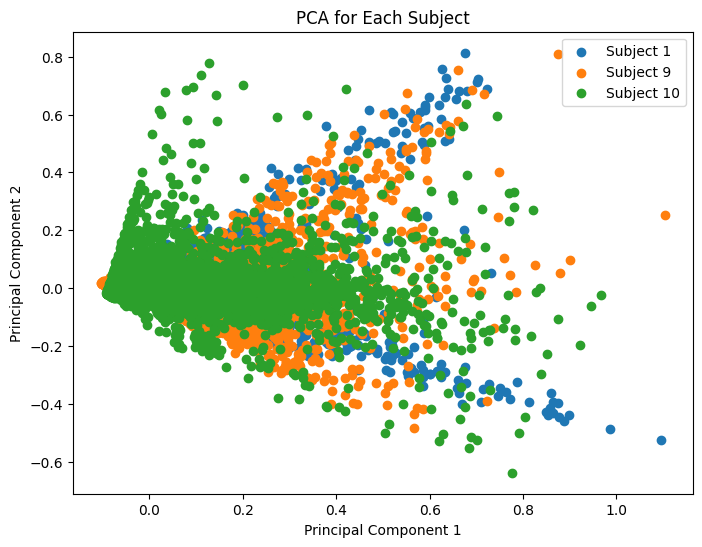

In [ ]:
sample = full_data[full_data['subject_num'].isin([1,9,10])]
grouped = sample.groupby('subject_num')

# Initialize PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed

plt.figure(figsize=(8, 6))
data = []

# Apply PCA for each subject and plot
for subject, group in grouped:
    pca.fit(group[[58, 59, 60, 61]])
    transformed = pca.transform(group[[58, 59, 60, 61]])
    plt.scatter(transformed[:, 0], transformed[:, 1], label=f"Subject {subject}")

 # Calculating means and standard deviations for each principal component
    mean1 = transformed[:, 0].mean()
    mean2 = transformed[:, 1].mean()
    std1 = transformed[:, 0].std()
    std2 = transformed[:, 1].std()

    # Append the results to the data list
    data.append((mean1, mean2, std1, std2))


    print("Subject %s: Mean 1: %s" % (subject, transformed[:, 0].mean()))
    print("Subject %s: Mean 2: %s" % (subject, transformed[:, ].mean()))
    print("Subject %s: std 1: %s" % (subject, transformed[:, 0].std()))
    print("Subject %s: std 2: %s" % (subject, transformed[:, ].std()))
    print("**************")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for Each Subject')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr


# Convert to NumPy array for easier slicing
data_np = np.array(data)

# Extracting means and stds for correlation and distance calculations
means = data_np[:, :2]  # First two columns are means
stds = data_np[:, 2:]   # Last two columns are standard deviations

# Calculate Pearson Correlation for Means and Standard Deviations
corr_means = pearsonr(means[:, 0], means[:, 1])[0]  # Correlation between Mean1 and Mean2
corr_stds = pearsonr(stds[:, 0], stds[:, 1])[0]     # Correlation between Std1 and Std2

# Calculate Proximity (Distance) Measures
# Using Euclidean distance as an example. You can use other metrics like 'cosine', 'cityblock' (Manhattan)
distance_matrix_means = squareform(pdist(means, metric='euclidean'))
distance_matrix_stds = squareform(pdist(stds, metric='euclidean'))

# Print the results
print("Correlation between Mean1 and Mean2 across all subjects:", corr_means)
print("Correlation between Std1 and Std2 across all subjects:", corr_stds)

print("Distance matrix for Means (Euclidean):")
print(distance_matrix_means)

print("Distance matrix for Stds (Euclidean):")
print(distance_matrix_stds)


Correlation between Mean1 and Mean2 across all subjects: -0.8150893644979578
Correlation between Std1 and Std2 across all subjects: -0.3272230420968891
Distance matrix for Means (Euclidean):
[[0.00000000e+00 1.13634369e-17 5.51060749e-18]
 [1.13634369e-17 0.00000000e+00 7.53820644e-18]
 [5.51060749e-18 7.53820644e-18 0.00000000e+00]]
Distance matrix for Stds (Euclidean):
[[0.         0.00665815 0.0240775 ]
 [0.00665815 0.         0.01745533]
 [0.0240775  0.01745533 0.        ]]


### **Generate Heatmap for Distance Matrix**

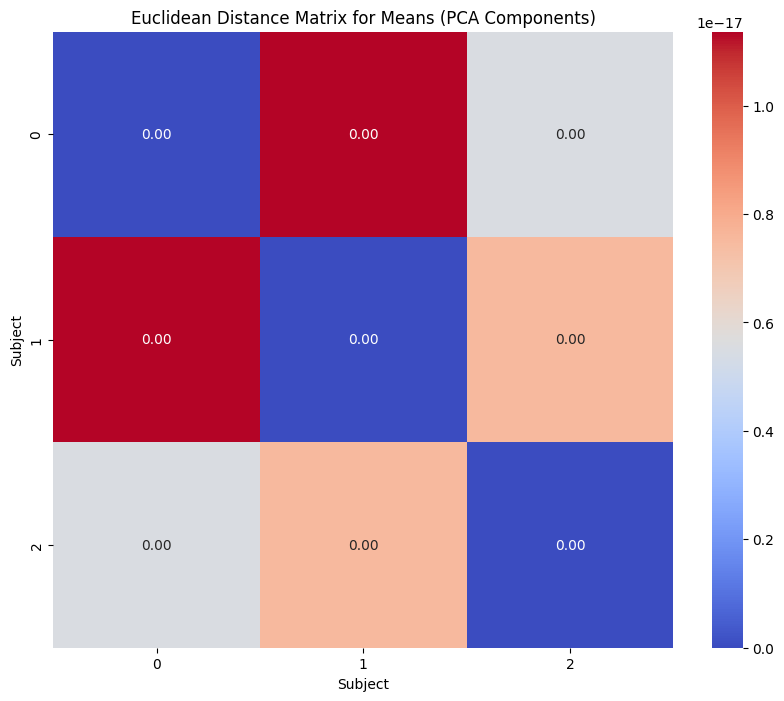

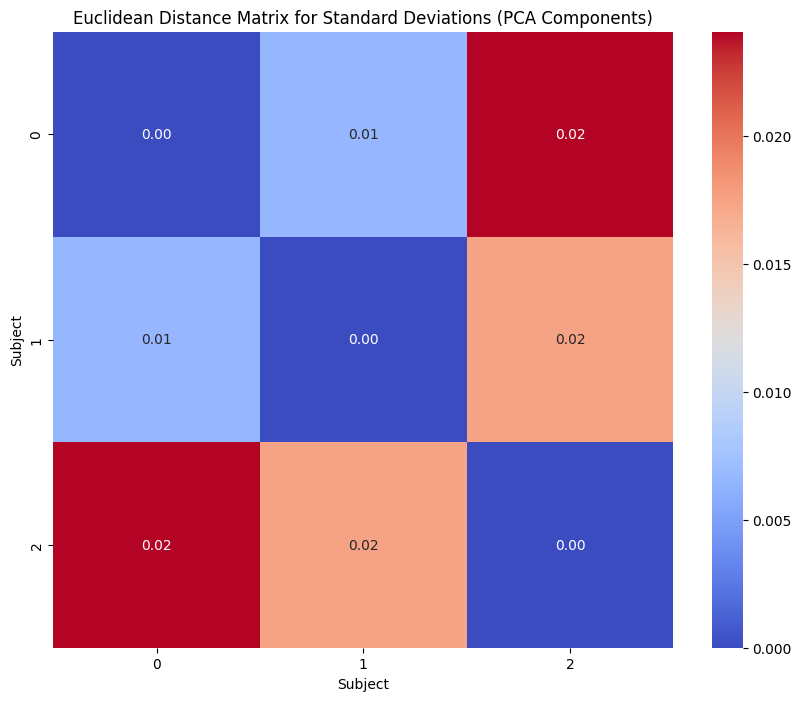

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'distance_matrix_means' and 'distance_matrix_stds' are defined from the previous step

# Plotting Heatmap for Mean Distance Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_means, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Euclidean Distance Matrix for Means (PCA Components)')
plt.xlabel('Subject')
plt.ylabel('Subject')
plt.show()

# Plotting Heatmap for Standard Deviation Distance Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_stds, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Euclidean Distance Matrix for Standard Deviations (PCA Components)')
plt.xlabel('Subject')
plt.ylabel('Subject')
plt.show()


### **Scatter Plot or Bar Graph**

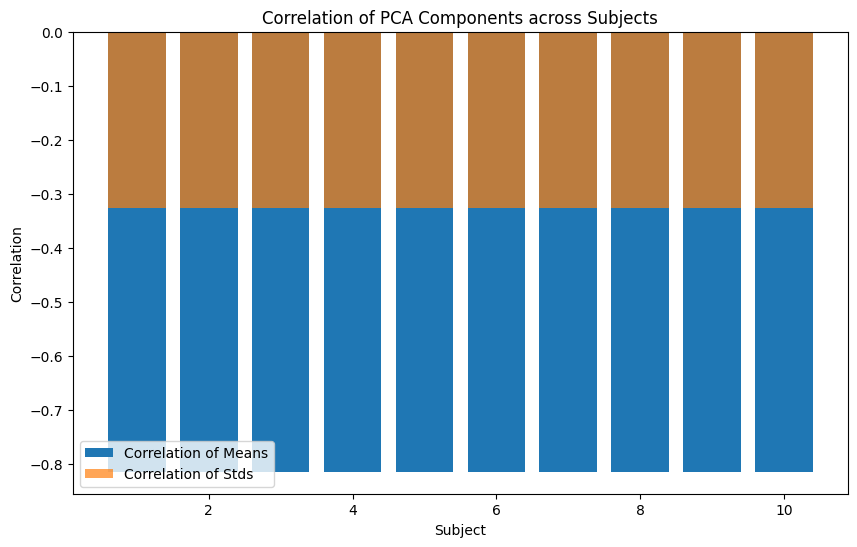

In [ ]:
# Assuming 'corr_means' and 'corr_stds' are defined from the previous step

# Subjects
subjects = list(range(1, 11))  # Adjust based on actual subject numbers

plt.figure(figsize=(10, 6))
plt.bar(subjects, corr_means, label='Correlation of Means')
plt.bar(subjects, corr_stds, label='Correlation of Stds', alpha=0.7)
plt.xlabel('Subject')
plt.ylabel('Correlation')
plt.title('Correlation of PCA Components across Subjects')
plt.legend()
plt.show()


### **Correlation Analysis**

====== Subject number 1 =====


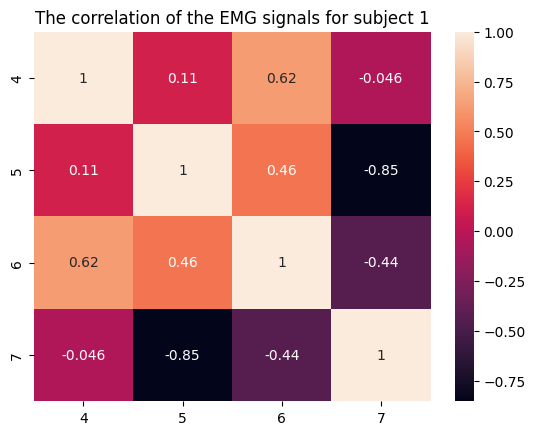

====== Subject number 2 =====


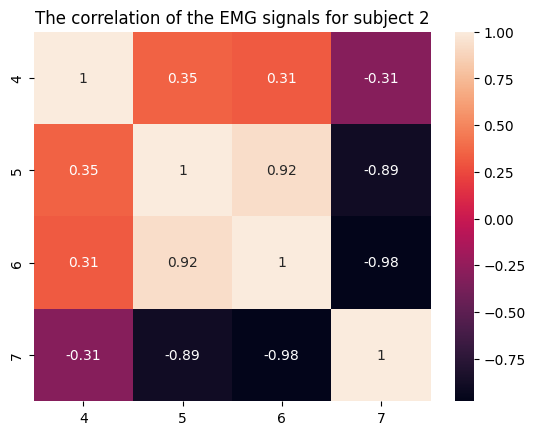

====== Subject number 3 =====


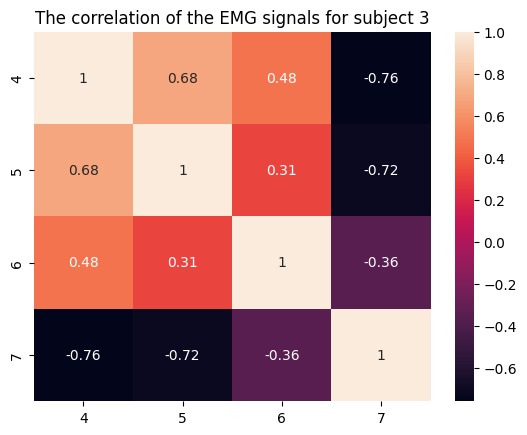

====== Subject number 4 =====


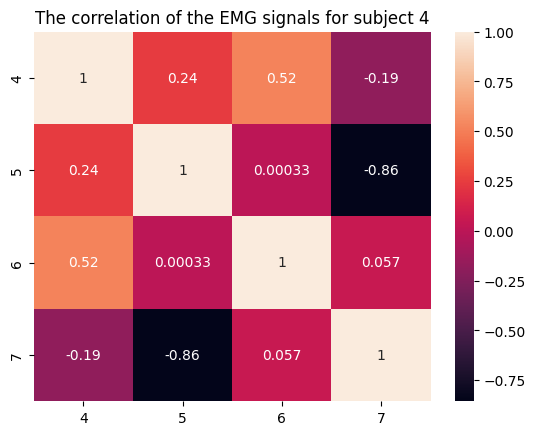

====== Subject number 5 =====


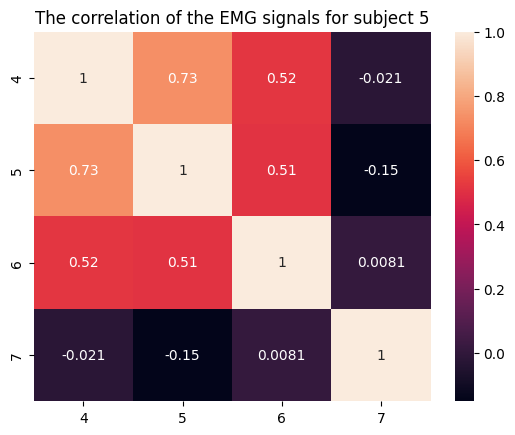

====== Subject number 6 =====


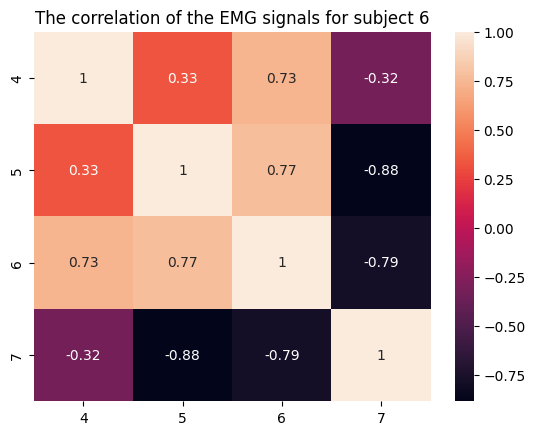

====== Subject number 7 =====


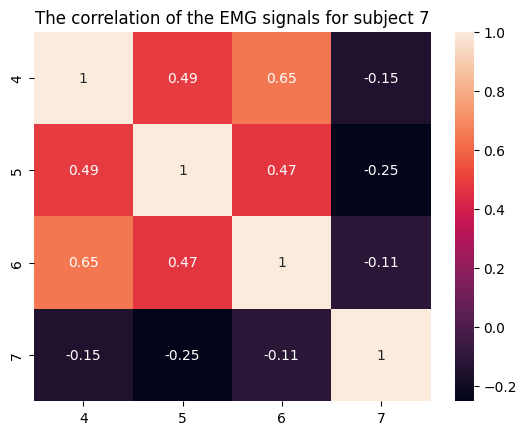

====== Subject number 8 =====


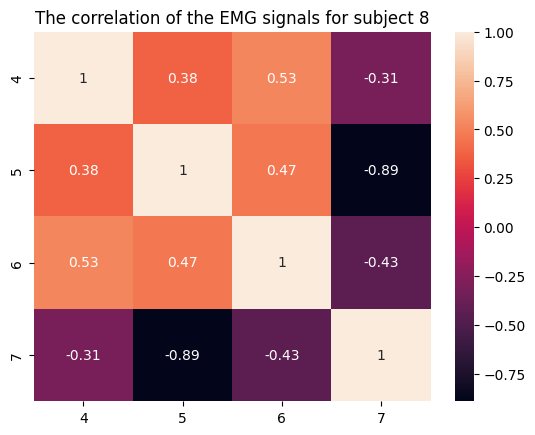

====== Subject number 9 =====


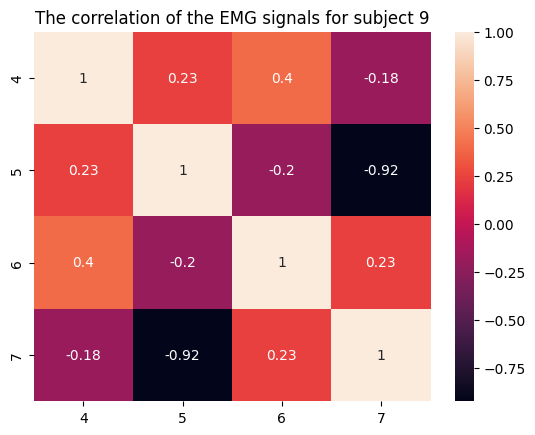

====== Subject number 10 =====


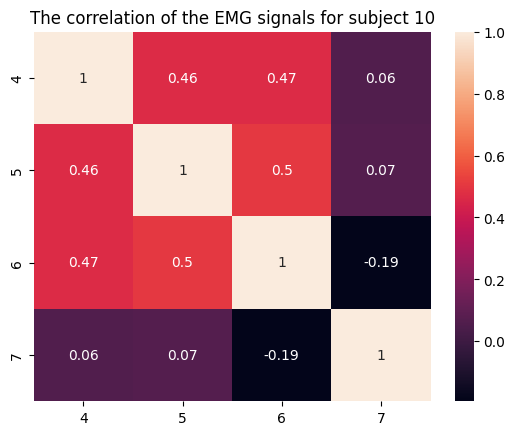

In [ ]:
def correlation(data, sub_num):
    data1 = full_data[full_data['subject_num'] == sub_num]
    graph = sns.heatmap(data1.drop('subject_num', axis=1).corr(), annot=True)
    graph.set_title(f'The correlation of the EMG signals for subject {sub_num}')
    plt.show()
for i in range(1, 11):
    print(f'====== Subject number {i} =====')
    correlation(full_data, i)

In [ ]:
import pandas as pd

def correlation_summary(data):
    summary = []
    for i in range(1, 11):
        data1 = data[data['subject_num'] == i]
        corr_values = data1.drop('subject_num', axis=1).corr().values.flatten()
        corr_values = abs(corr_values)
        avg_corr = corr_values.mean()
        std_corr = corr_values.std()
        min_corr = corr_values.min()
        max_corr = corr_values.max()

        summary.append({
            'Subject': f'Subject {i}',
            'Average Correlation': avg_corr,
            'Standard Deviation': std_corr,
            'Minimum Correlation': min_corr,
            'Maximum Correlation': max_corr
        })

    return pd.DataFrame(summary)
summary_data = correlation_summary(full_data)
summary_data.sort_values('Standard Deviation') # Sorting based on Standard Deviation

,Subject,Average Correlation,Standard Deviation,Minimum Correlation,Maximum Correlation
0,Subject 1,0.556047,0.229025,0.016080,1.0
3,Subject 4,0.477399,0.241213,0.033944,1.0
7,Subject 8,0.237944,0.256892,0.002315,1.0
1,Subject 2,0.524151,0.257549,0.000136,1.0
2,Subject 3,0.436115,0.264003,0.050940,1.0
9,Subject 10,0.362438,0.272029,0.004368,1.0
6,Subject 7,0.302590,0.275250,0.009942,1.0
8,Subject 9,0.437225,0.278358,0.030340,1.0
4,Subject 5,0.388334,0.282641,0.000167,1.0
5,Subject 6,0.399381,0.284460,0.004582,1.0


### **Checking data distribution**

====== Subject number 1 =====


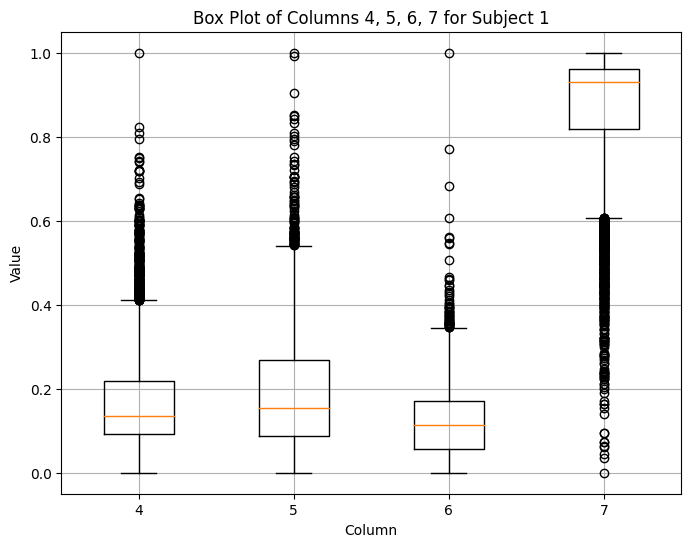

====== Subject number 2 =====


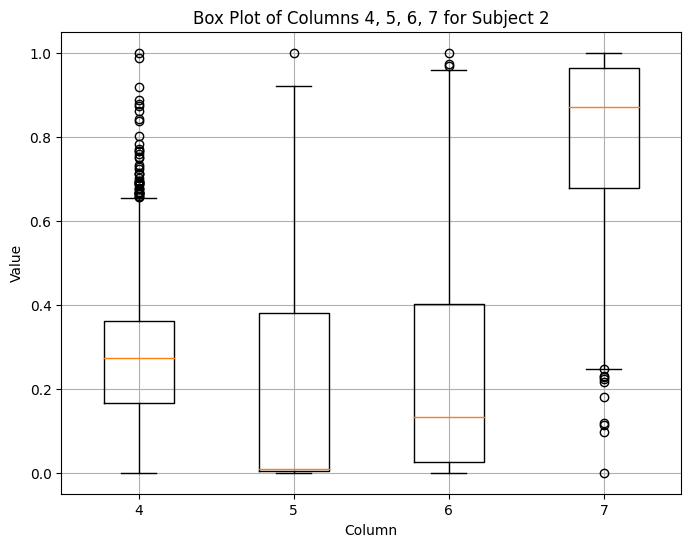

====== Subject number 3 =====


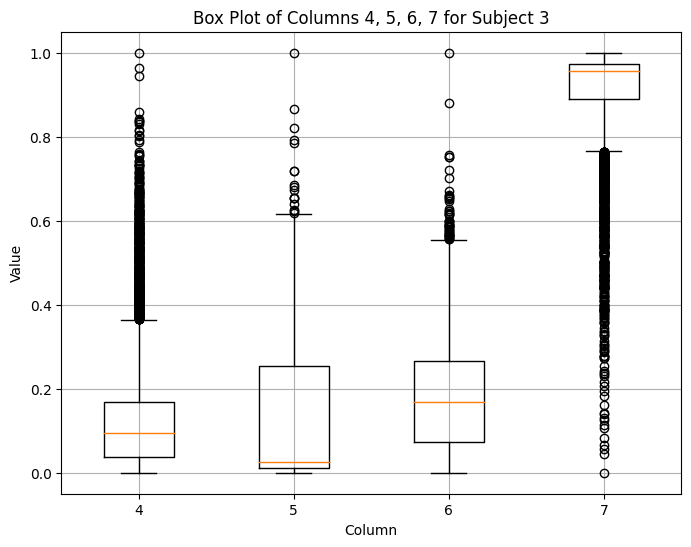

====== Subject number 4 =====


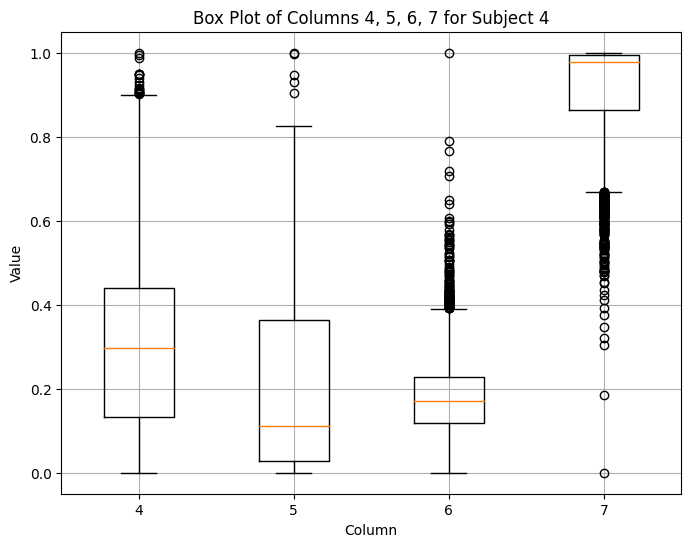

====== Subject number 5 =====


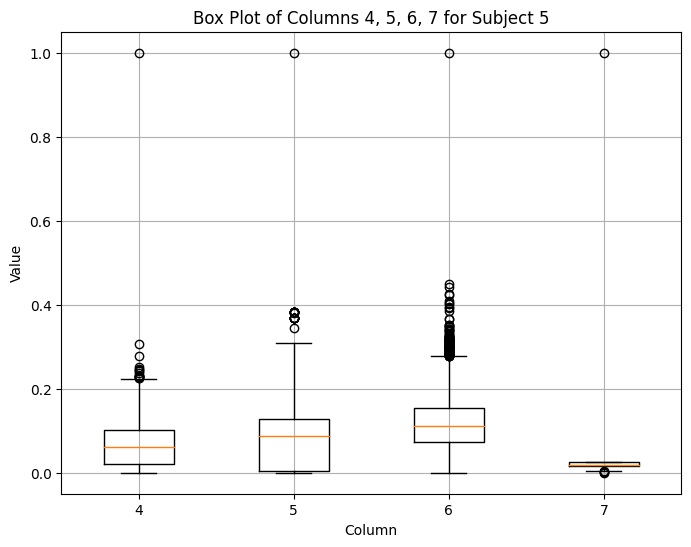

====== Subject number 6 =====


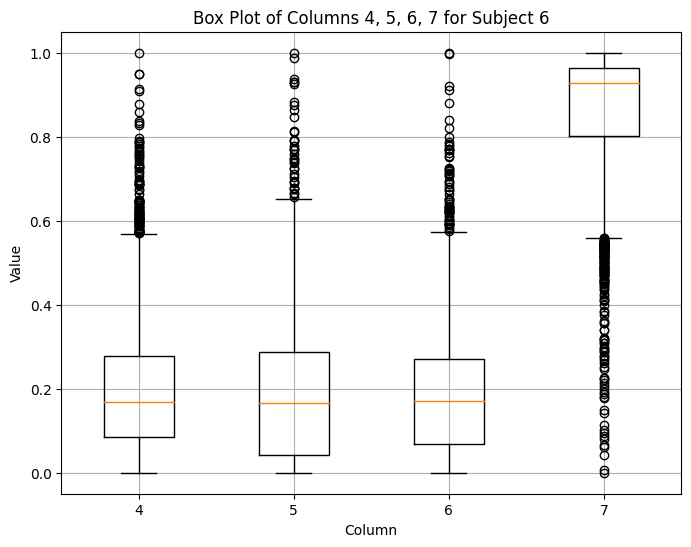

====== Subject number 7 =====


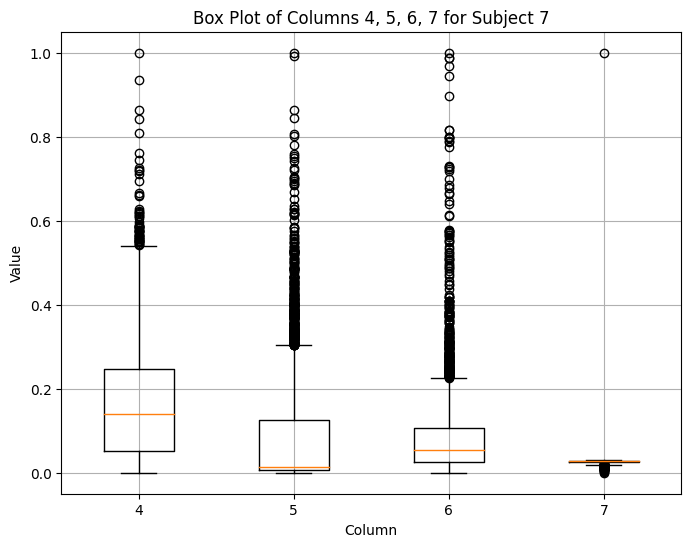

====== Subject number 8 =====


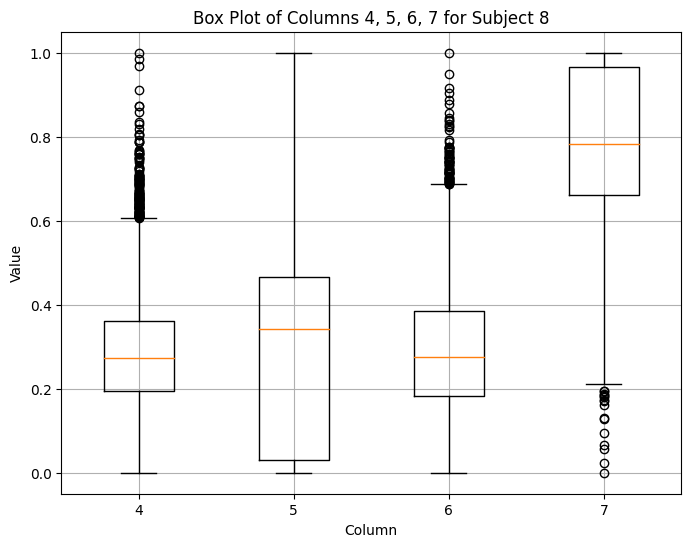

====== Subject number 9 =====


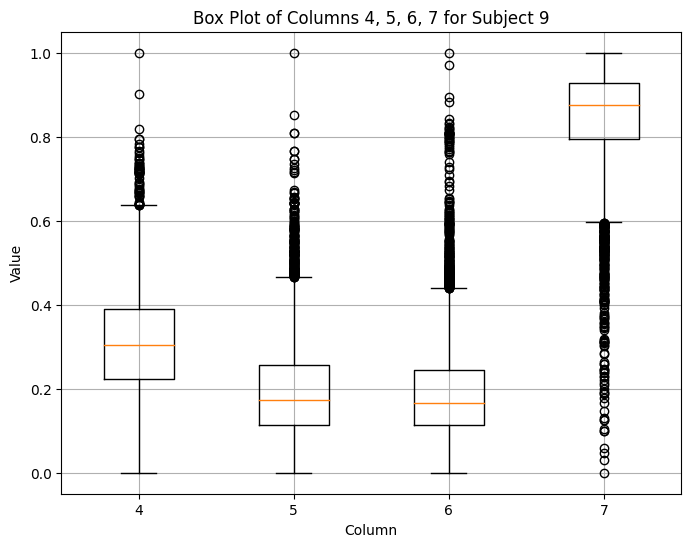

====== Subject number 10 =====


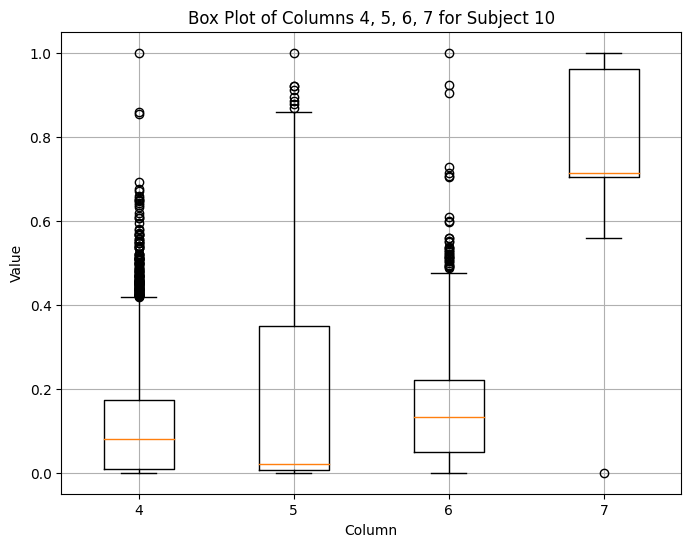

In [ ]:
for i in range(1, 11):
    print(f'====== Subject number {i} =====')
    data_subject = full_data[full_data['subject_num'] == i]
    data_columns = [data_subject[col] for col in [4, 5, 6, 7]]

    plt.figure(figsize=(8, 6))
    plt.boxplot(data_columns, labels=[4, 5, 6, 7], showfliers=True)

    plt.title(f'Box Plot of Columns 4, 5, 6, 7 for Subject {i}')
    plt.xlabel('Column')
    plt.ylabel('Value')

    plt.grid(True)
    plt.show()


### **Bar graph for every channel**

====== Subject number 1 =====


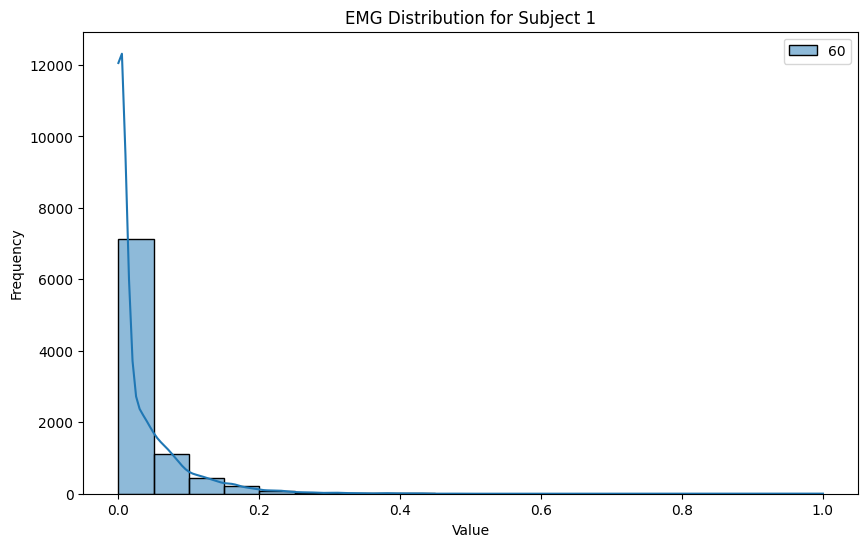

====== Subject number 2 =====


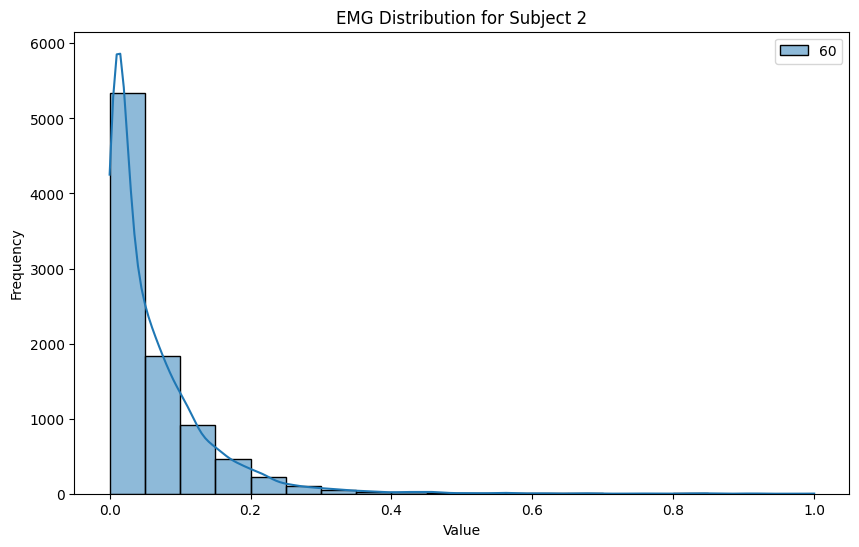

====== Subject number 3 =====


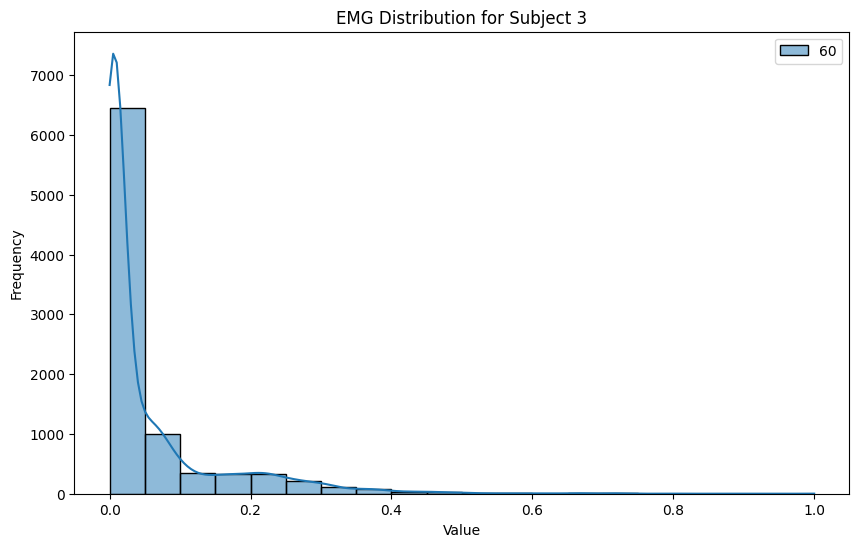

====== Subject number 4 =====


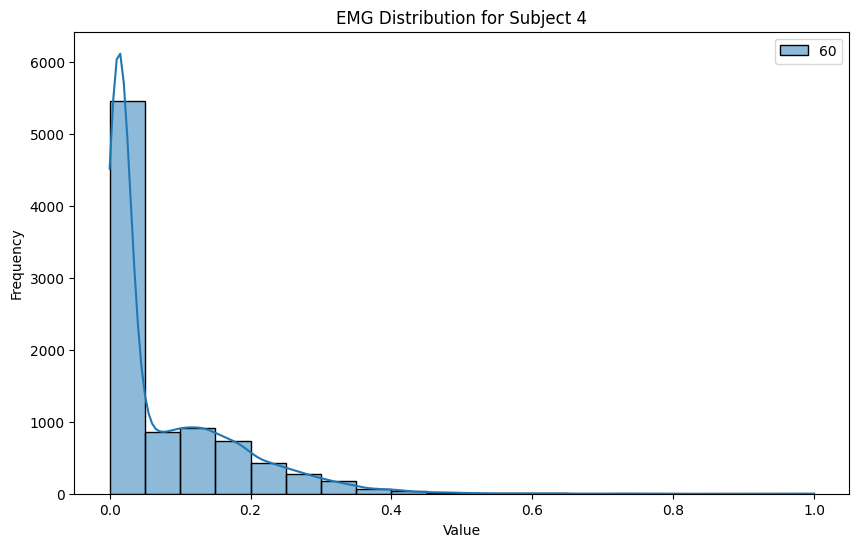

====== Subject number 5 =====


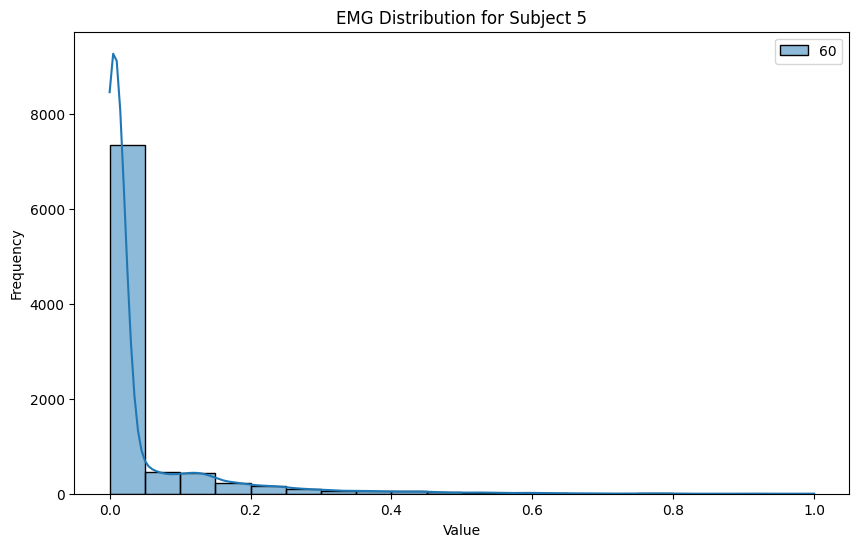

====== Subject number 6 =====


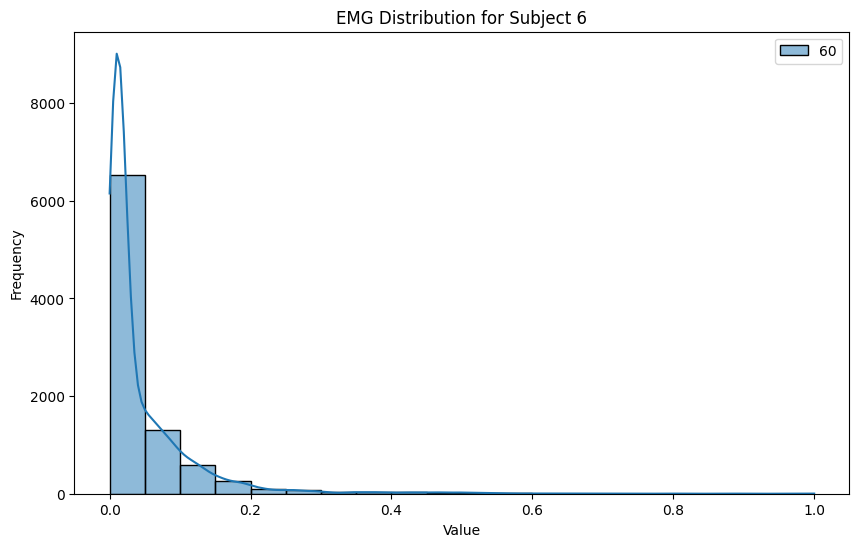

====== Subject number 7 =====


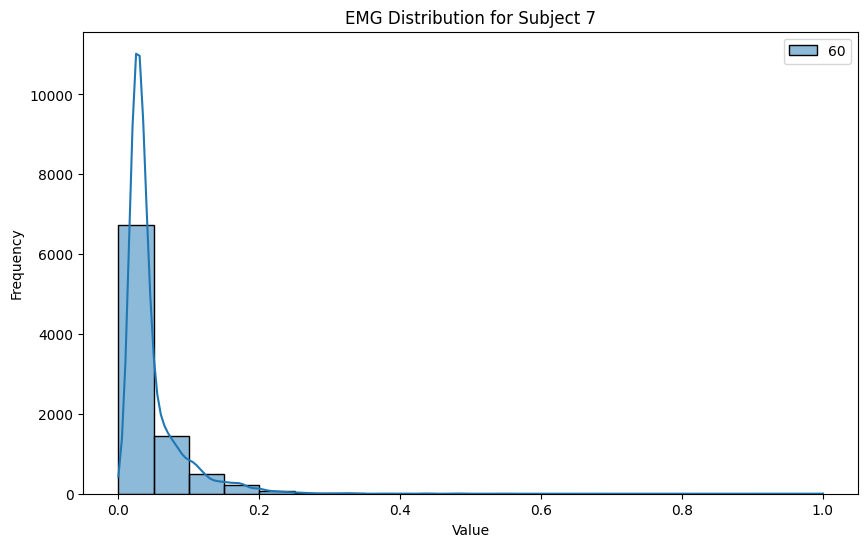

====== Subject number 8 =====


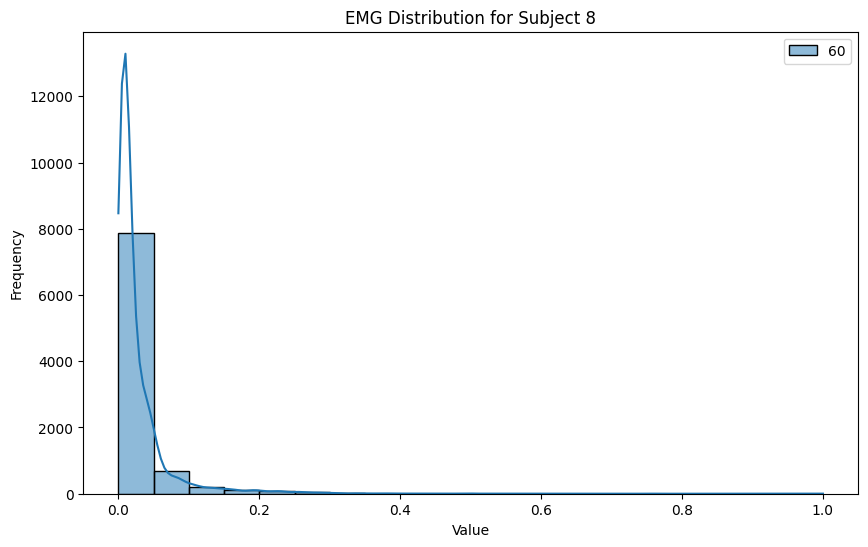

====== Subject number 9 =====


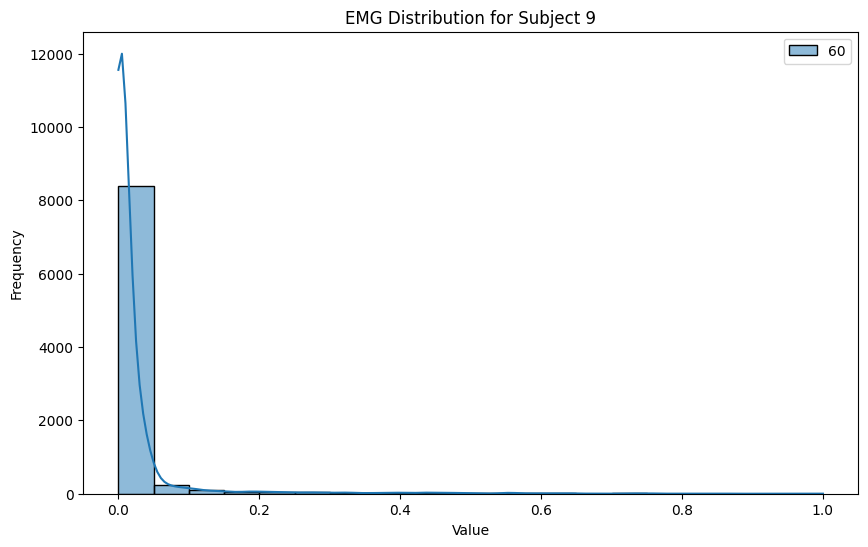

====== Subject number 10 =====


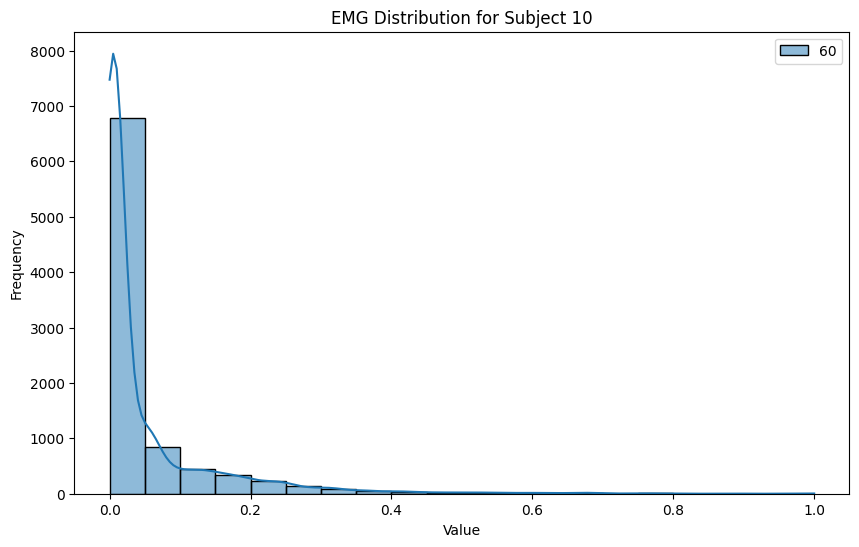

====== Subject number 11 =====


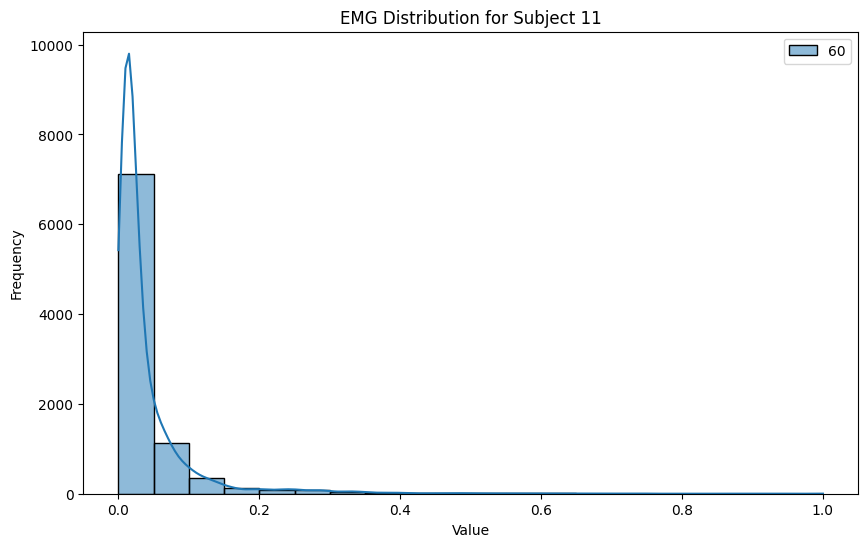

====== Subject number 12 =====


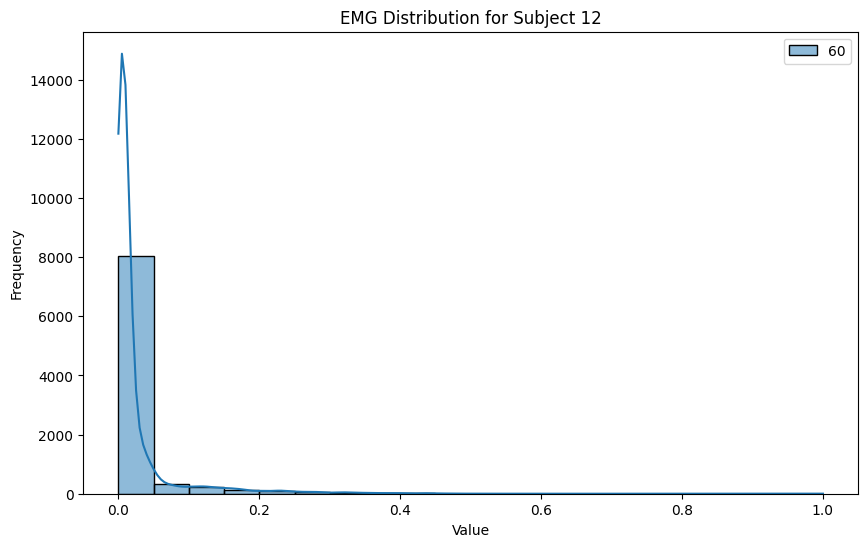

====== Subject number 13 =====


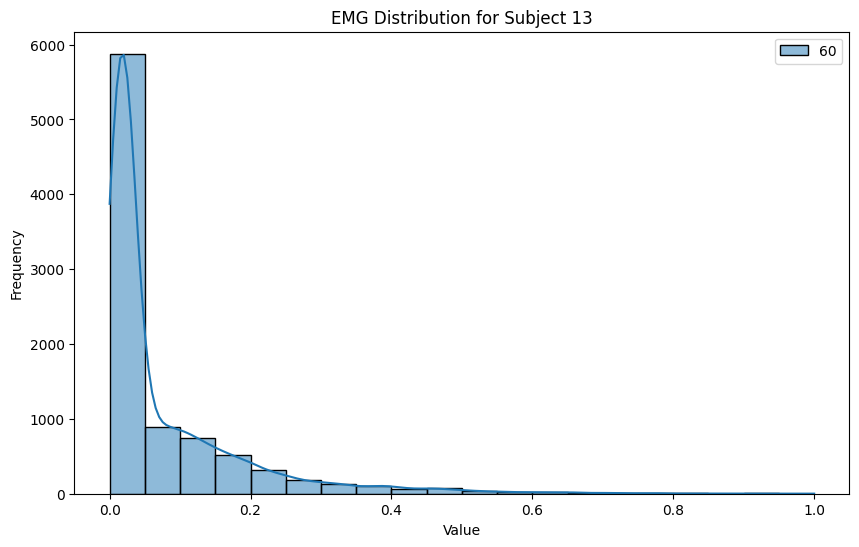

====== Subject number 14 =====


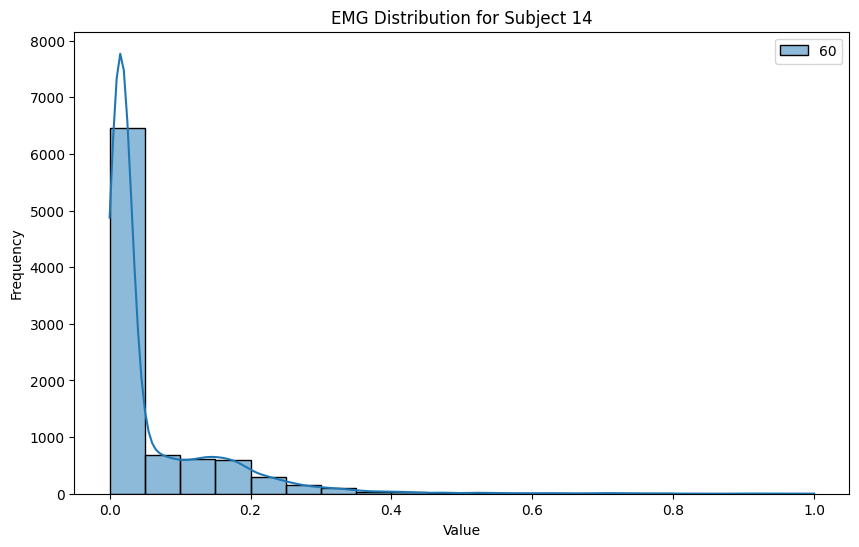

====== Subject number 15 =====


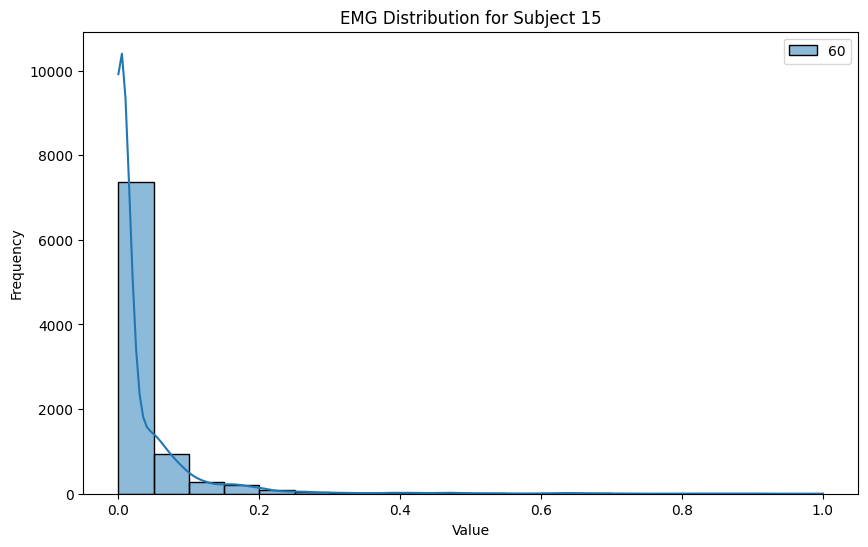

====== Subject number 16 =====


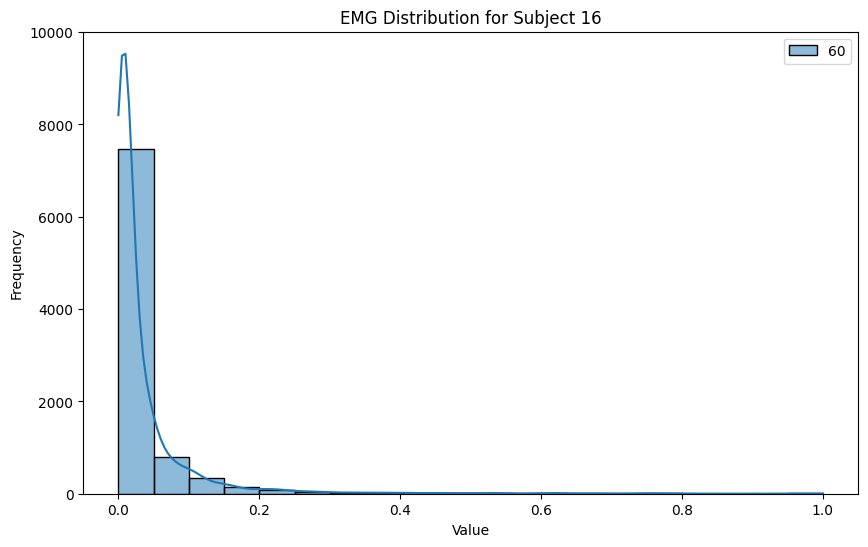

====== Subject number 17 =====


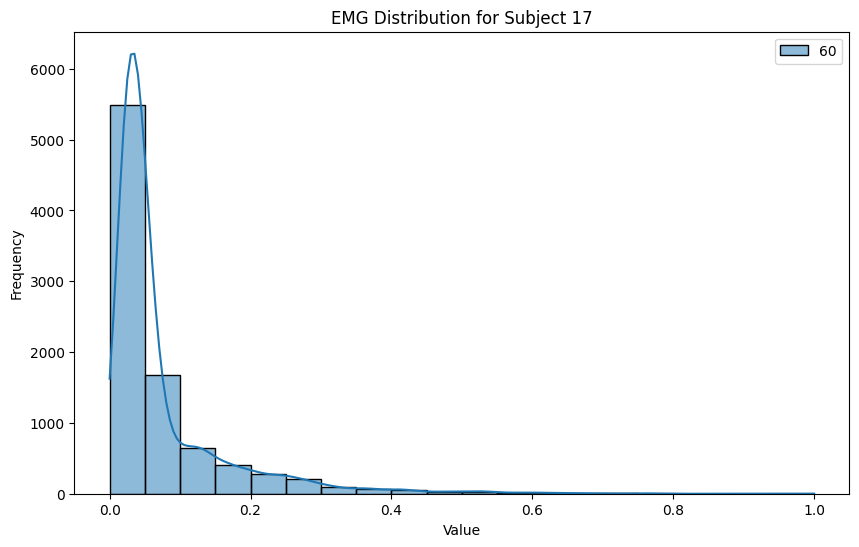

====== Subject number 18 =====


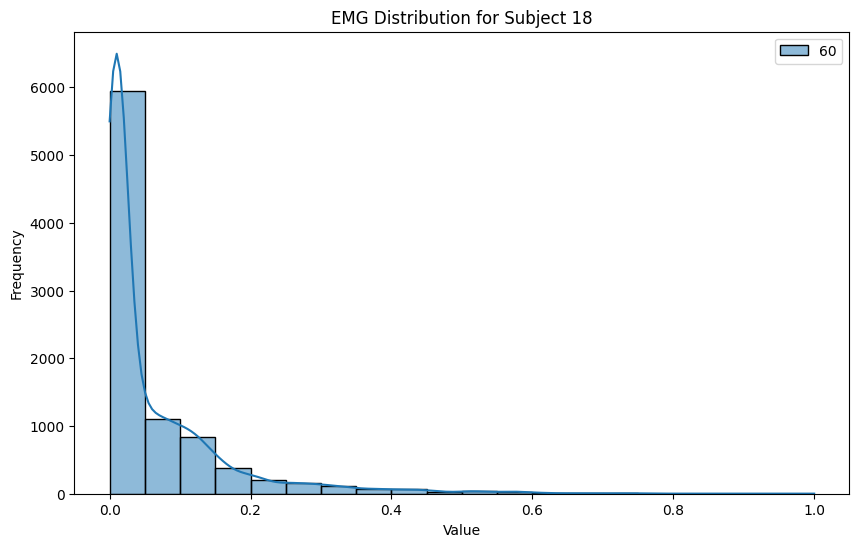

====== Subject number 19 =====


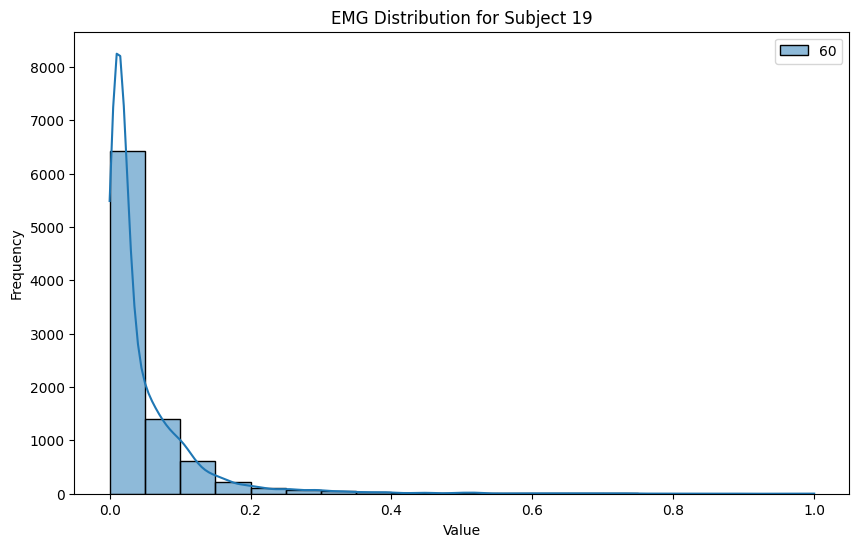

====== Subject number 20 =====


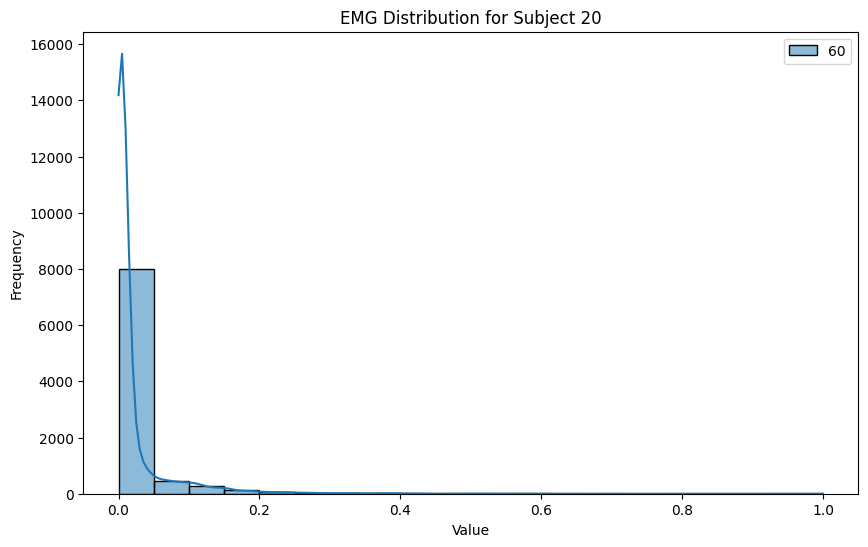

====== Subject number 21 =====


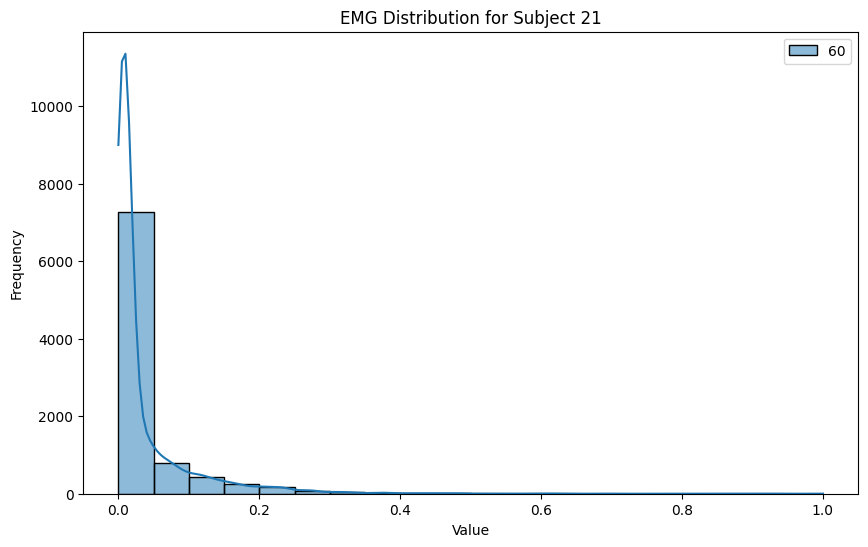

====== Subject number 22 =====


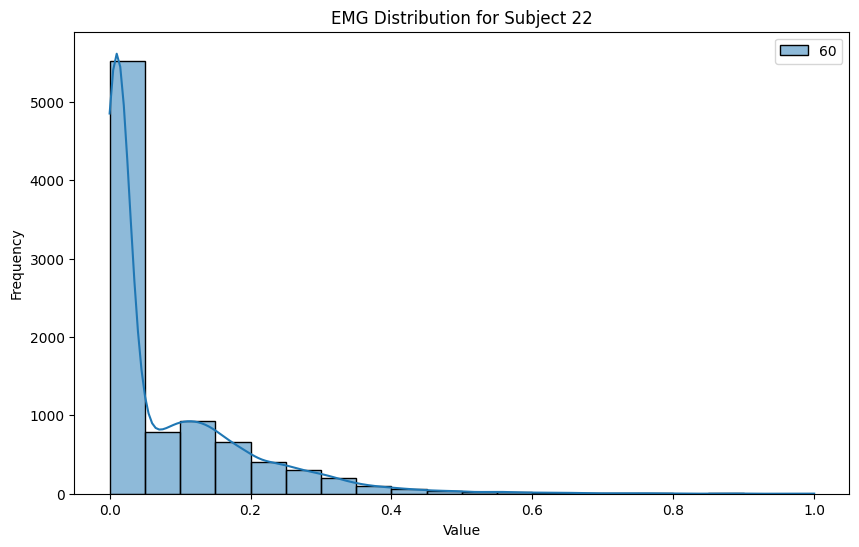

====== Subject number 23 =====


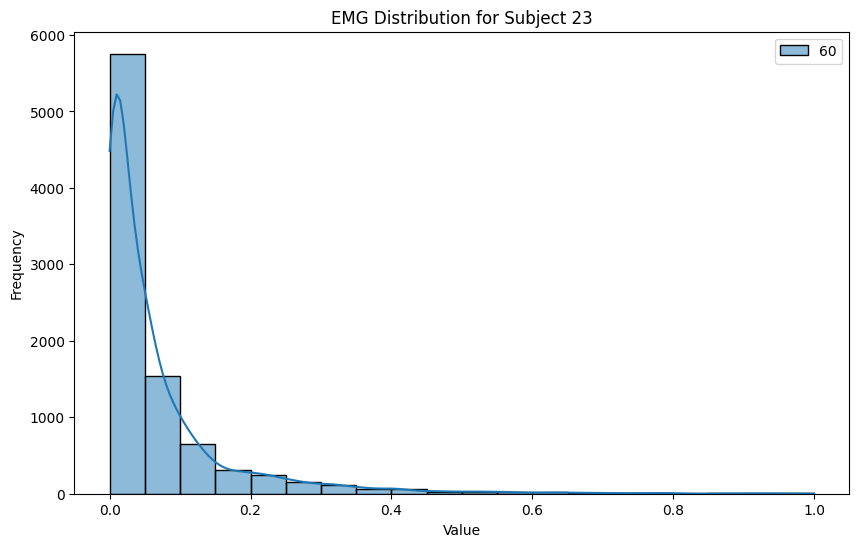

====== Subject number 24 =====


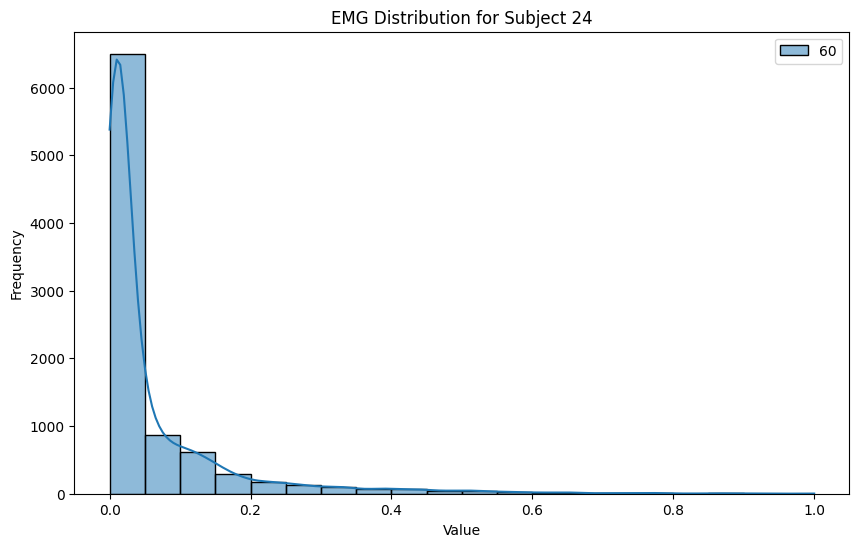

====== Subject number 25 =====


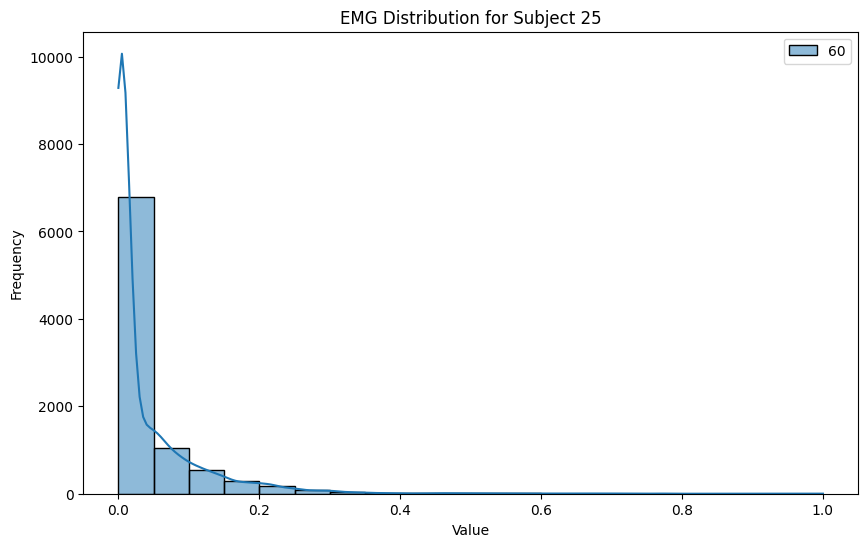

====== Subject number 26 =====


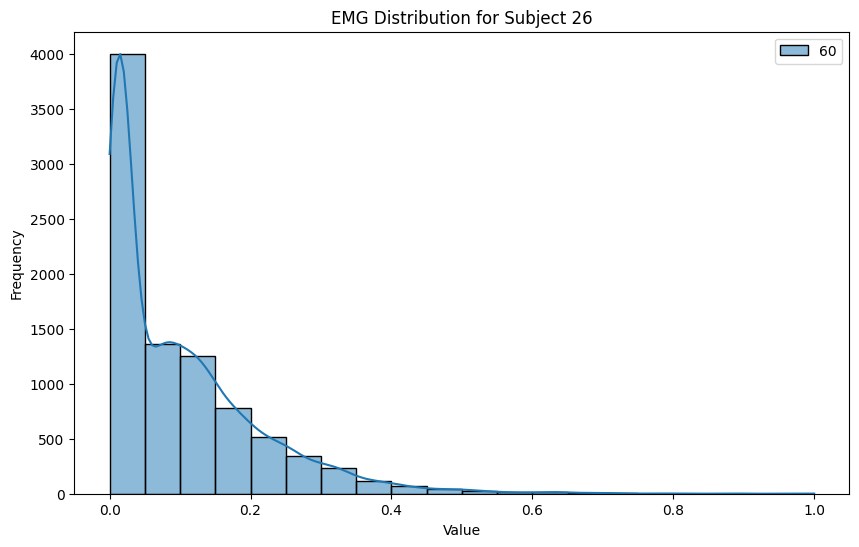

====== Subject number 27 =====


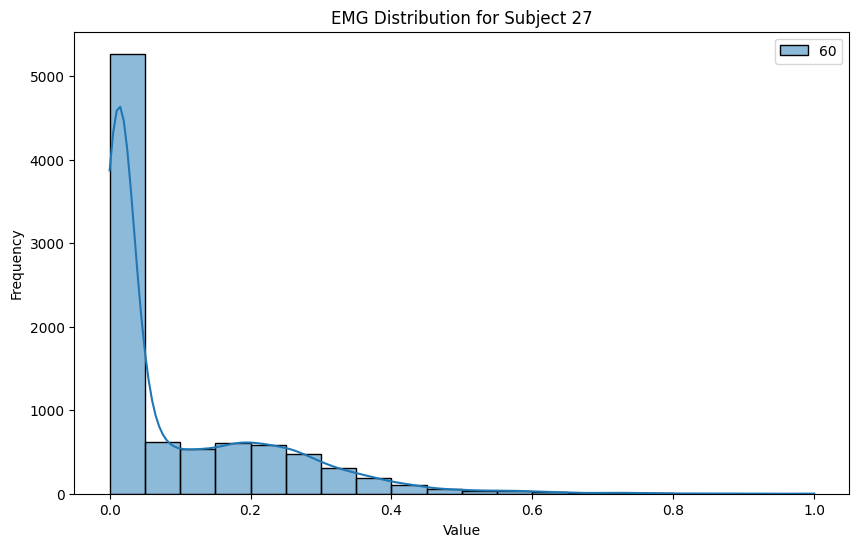

====== Subject number 28 =====


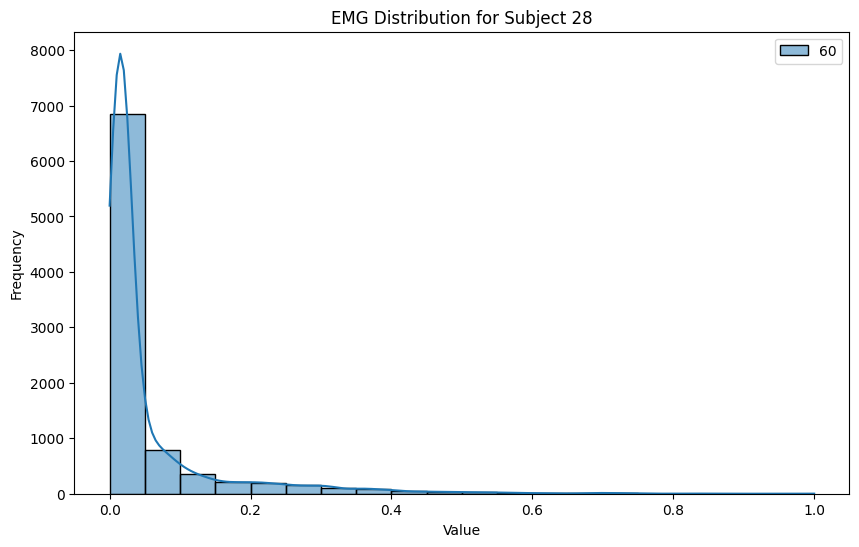

====== Subject number 29 =====


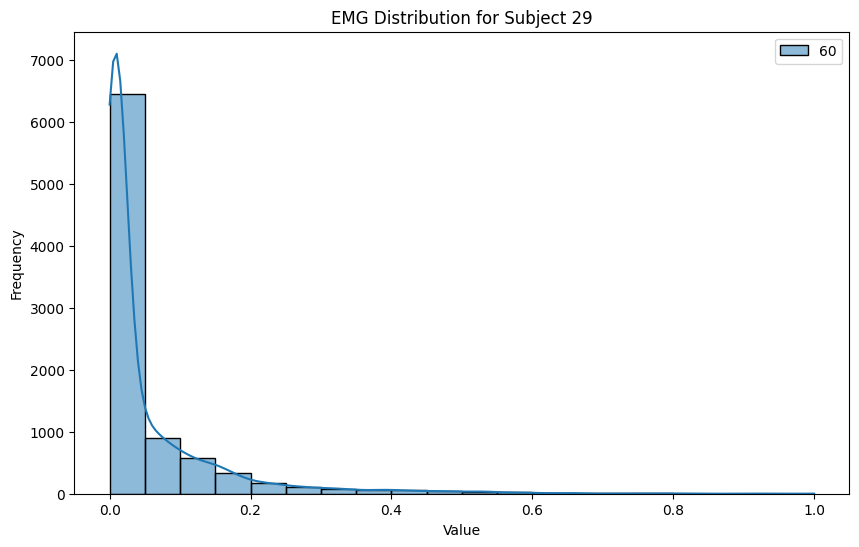

====== Subject number 30 =====


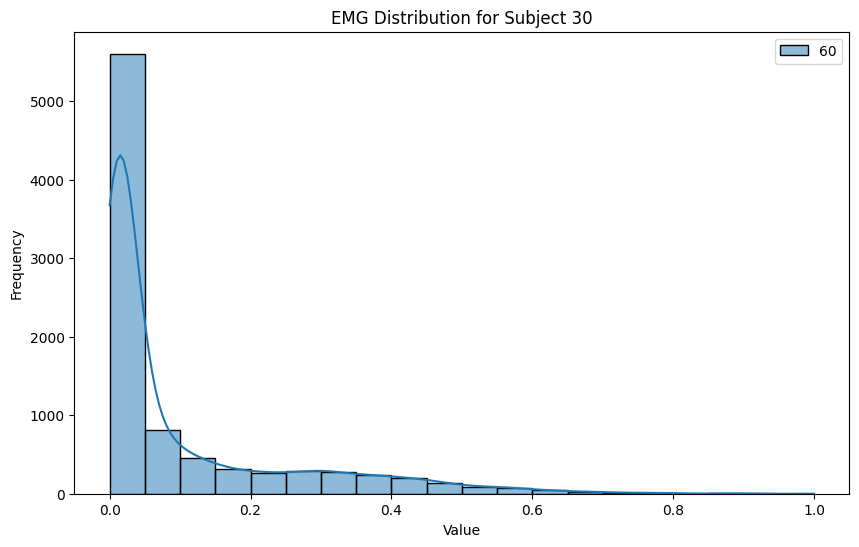

====== Subject number 31 =====


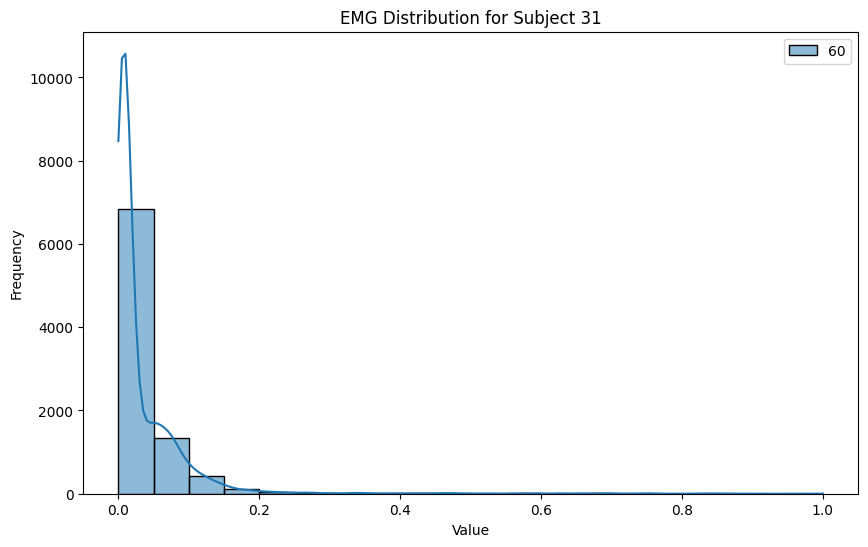

====== Subject number 32 =====


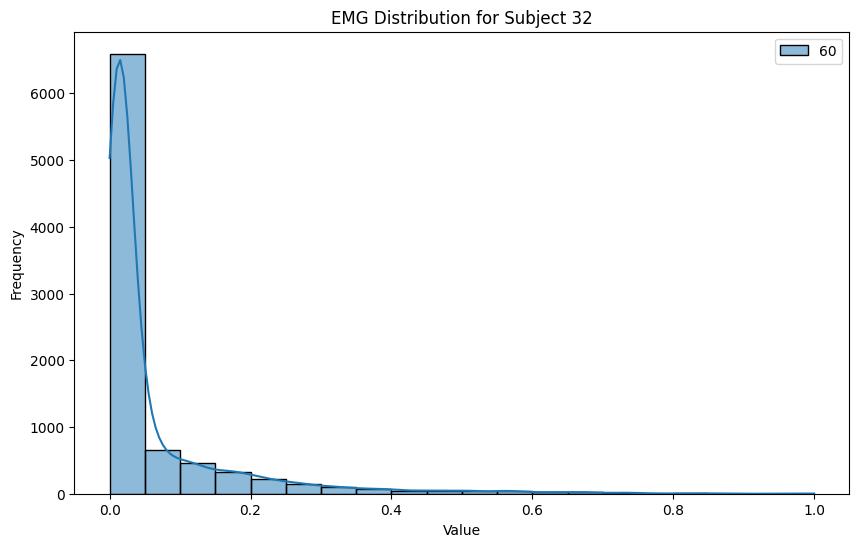

====== Subject number 33 =====


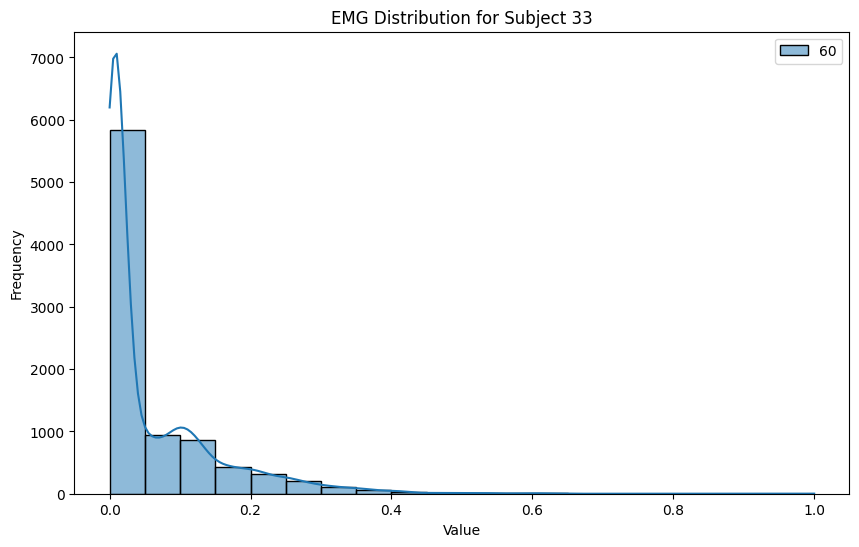

====== Subject number 34 =====


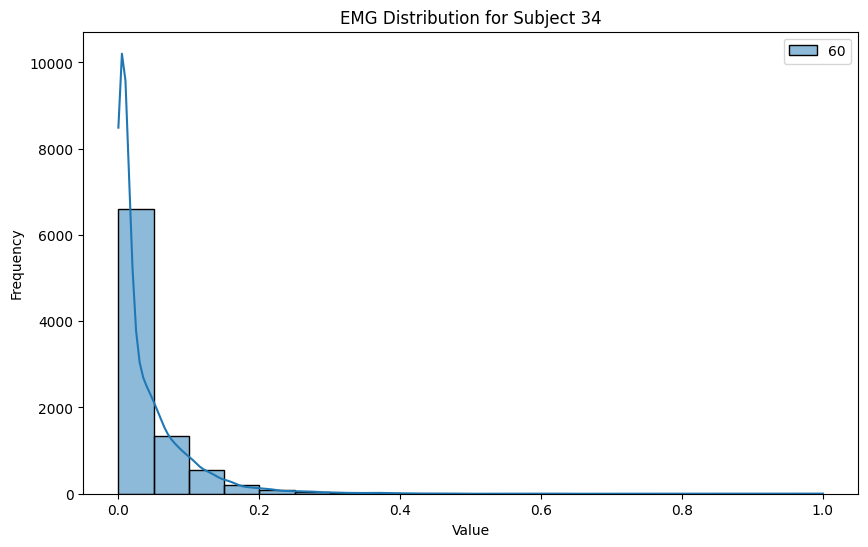

====== Subject number 35 =====


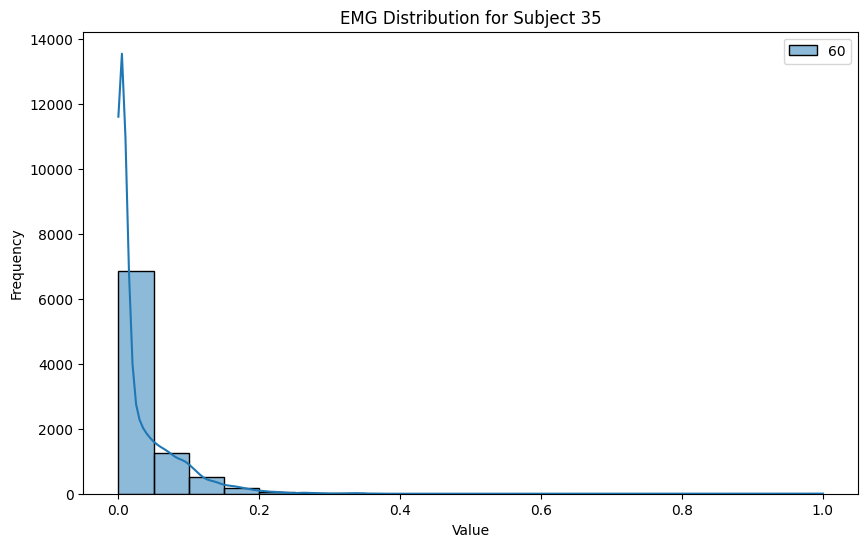

====== Subject number 36 =====


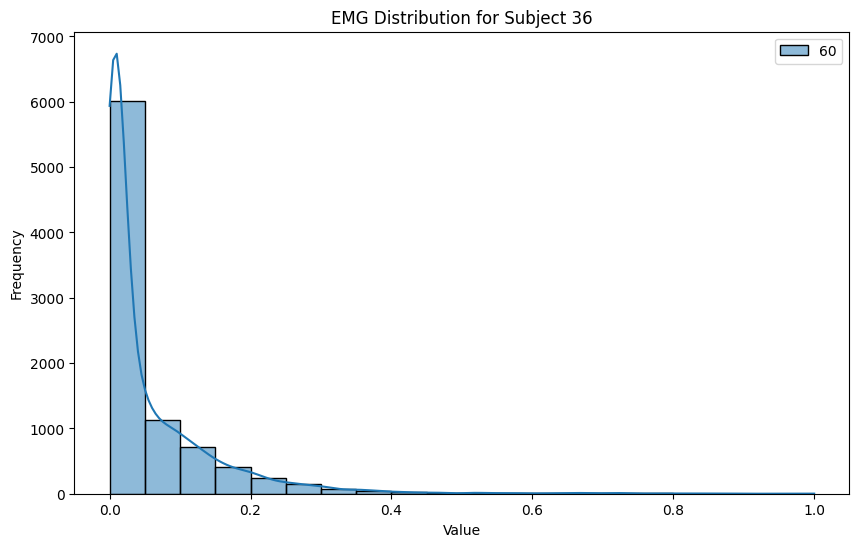

====== Subject number 37 =====


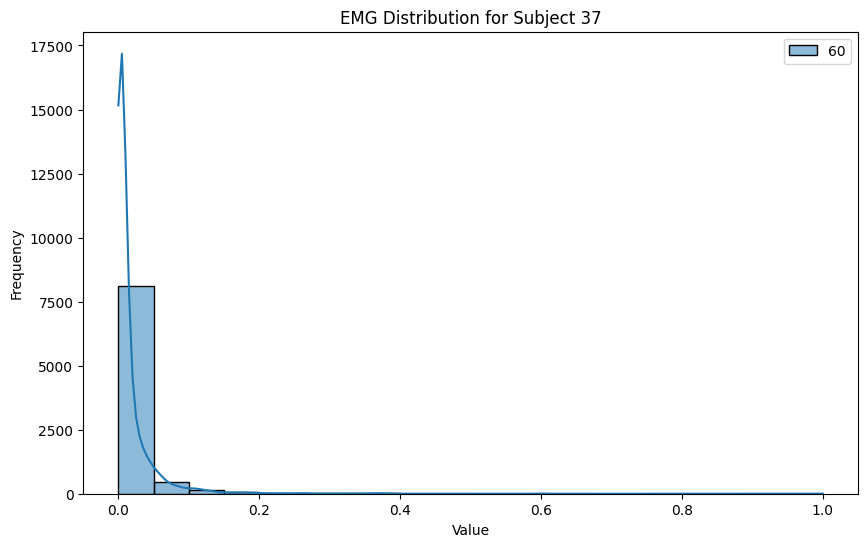

====== Subject number 38 =====


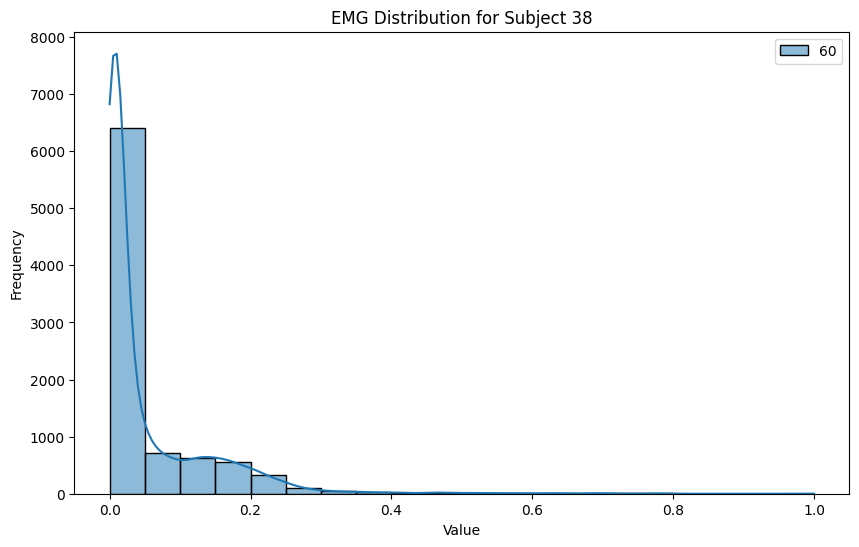

====== Subject number 39 =====


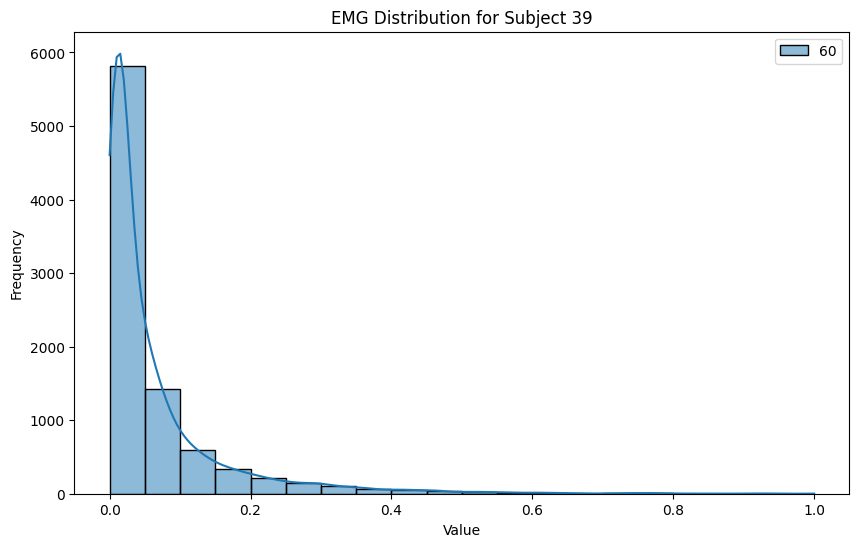

====== Subject number 40 =====


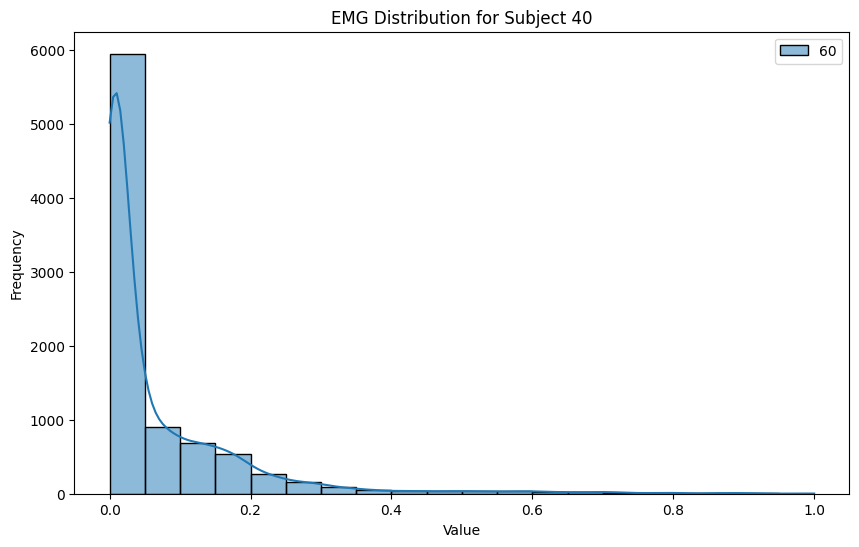

In [ ]:
columns_to_plot = [60]
grouped_data = full_data.groupby('subject_num')

for subject, data in grouped_data:
    print(f'====== Subject number {subject} =====')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data[columns_to_plot], bins=20, kde=True)
    plt.title(f"EMG Distribution for Subject {subject}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()